# Main

## Preset

In [5]:
ver = 'ver.0.8.4'

In [6]:
import re
import pandas as pd
from pathlib import Path
import numpy as np
import dask.dataframe as dd

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from scipy import stats

import matplotlib.cm as cm
import matplotlib.colors as mcolors
import plotly.graph_objects as go

from itertools import product

# pd.options.display.max_rows = 30

## Importing

In [ ]:
# base_dir = Path(r"1. PBC\DATA")
# txt_paths = sorted(
#     p for p in base_dir.rglob("*.txt")
#     if "회계감사론파일" in p.name
# )

# print(f"Found {len(txt_paths)} text files:")
# for p in txt_paths:
#     print("  .", p)

# frames = []
# for path in txt_paths:
#     df = pd.read_csv(path, sep='|', encoding='euc_kr', low_memory=False)
#     df["c_file"] = path.name
#     frames.append(df)

# loan = pd.concat(frames, ignore_index=True)
# loan.to_csv(r"부산은행 DA\DATA\loan.csv", index=False)
# print("Combined shape: ", loan.shape)

In [ ]:
loan = pd.read_csv(r"부산은행 DA\DATA\loan.csv", encoding='euc-kr', low_memory=False)

In [ ]:
# base_dir = Path(r"1. PBC\DATA")
# txt_paths = sorted(
#     p for p in base_dir.rglob("*.txt")
#     if "분류대상계좌정보_" in p.name
# )

# print(f"Found {len(txt_paths)} text files:")
# for p in txt_paths:
#     print("  .", p)

# frames = []
# for path in txt_paths:
#     df = pd.read_csv(path, sep='|', encoding='euc_kr', low_memory=False)
#     df["c_file"] = path.name
#     frames.append(df)

# stage2 = pd.concat(frames, ignore_index=True)
# stage2.to_csv(r"부산은행 DA\DATA\stage2.csv", index=False)
# print("Combined shape: ", stage2.shape)

In [ ]:
stage2 = pd.read_csv(r"부산은행 DA\DATA\stage2.csv", encoding='euc-kr', low_memory=False)

### Importing 9 quarters data

In [ ]:
# base_dir = Path(r"1. PBC\DATA")
# txt_paths = sorted(
#     p for p in base_dir.rglob("*.txt")
#     if "회계감사론파일" in p.name
# )

# print(f"Found {len(txt_paths)} text files:")
# for p in txt_paths:
#     print("  .", p)

# frames = []
# for path in txt_paths:
#     df = pd.read_csv(path, sep='|', encoding='euc_kr', low_memory=False)
#     df["c_file"] = path.name
#     frames.append(df)

# loan_long = pd.concat(frames, ignore_index=True)
# loan_long.to_csv(r"부산은행 DA\DATA\loan_long.csv", encoding='euc-kr', index=False)
# print("Combined shape: ", loan_long.shape)

In [ ]:
# base_dir = Path(r"1. PBC\DATA")
# txt_paths = sorted(
#     p for p in base_dir.rglob("*.txt")
#     if "분류대상계좌정보_" in p.name
# )

# print(f"Found {len(txt_paths)} text files:")
# for p in txt_paths:
#     print("  .", p)

# frames = []
# for path in txt_paths:
#     df = pd.read_csv(path, sep='|', encoding='euc_kr', low_memory=False)
#     df["c_file"] = path.name
#     frames.append(df)

# stage2_long = pd.concat(frames, ignore_index=True)
# stage2_long.to_csv(r"부산은행 DA\DATA\stage2_long.csv", encoding='euc-kr', index=False)
# print("Combined shape: ", stage2_long.shape)

In [ ]:
loan = pd.read_csv(r"부산은행 DA\DATA\loan_long.csv", encoding='euc-kr', low_memory=False)

In [ ]:
stage2 = pd.read_csv(r"부산은행 DA\DATA\stage2_long.csv", encoding='euc-kr', low_memory=False)

## Cleaning


loan Cleaning

In [ ]:
print(loan.columns.tolist())

Loan
<div style="font-size: 15px">

- 기준년월
- KEY: 계좌번호
    - 기준년월 기준 계좌번호가 unique하지 않음. 만기를 다 갖고 있음 0부터 40까지. Loan DB DA를 할 때 어느 시점을 기준으로 분석해야 하는지 확인 필요.
    - Stage 2일때만 만기를 쭉 뿌린거 같은데 어느 만기의 레코드를 PowerBI에 사용하는지 확인해야함
- STAGE분류구분코드
- 만기구간간
- 신용등급 
- 소매여부
- EAD1: 대출잔액 / EAD2: 카드현금 / EAD3: 미수이자 / EAD4: 가지급금 / EAD5: 미사용한도 / EAD6: 지급보증
- 계좌PD
- 계좌LGD
- 총대손충당금
- 산업분류코드
- 연체여부 & 연체기간코드
    - 0인데 연체Y도 있고 4인데 연체N도 있음
- Pool포트폴리오구분코드 & 풀코드
- 부도계좌여부 & 부도고객여부
- 건전성과목구분코드
- PD대체여부
- 세그먼트번호일반 & 세그먼트번호기타 (통합클리닝 필요)
- 업무구분코드
- 건전성구분
- 기업가계구분코드 (NaN 존재)
- LGD세그먼트번호
- IRBEAD총액 (충당금담보EAD총액 + 충당금신용EAD총액)
- 담보여부
</div>

- 난내외 구분
- 신용카드 구분


In [ ]:
# Function to handle account numbers
def clean_account_number(x):
    x = str(x).strip()
    if x.isdigit():  # If the string contains only digits
        return str(int(x))  # Convert to int (removes leading zeros) then back to string
    return x  # For non-numeric values, keep as is

In [ ]:
## Loan Cleaning
loan_cleaned = loan.copy()

loan_cleaned = loan_cleaned[loan_cleaned['평가방법구분코드'].notna()]
loan_junk = loan_cleaned[loan_cleaned['평가방법구분코드'].isna()]

# 집합평가만
loan_cleaned = loan_cleaned[loan_cleaned['평가방법구분코드'] == 2.0]

# type cleaning
loan_cleaned['기준년월'] = loan_cleaned['기준년월'].astype(int)
loan_cleaned['계좌번호'] = loan_cleaned['계좌번호'].apply(clean_account_number)
loan_cleaned['신용등급'] = loan_cleaned['신용등급'].astype(str).str.strip()
loan_cleaned['신용등급'] = loan_cleaned['신용등급'].str.split('.').str[0]
loan_cleaned['BS계정과목코드'] = loan_cleaned['BS계정과목코드'].astype(str).str.strip()
loan_cleaned['STAGE분류구분코드'] = loan_cleaned['STAGE분류구분코드'].astype(str).str.strip()
loan_cleaned['연체기간코드'] = loan_cleaned['연체기간코드'].astype('Int64')

loan_cleaned['최초신용등급영문'] = loan_cleaned['최초신용등급영문'].astype(str).str.strip()
loan_cleaned['최초신용등급영문'] = loan_cleaned['최초신용등급영문'].str.split('.').str[0]
loan_cleaned['최초신용등급숫자'] = loan_cleaned['최초신용등급숫자'].astype(str).str.strip()
loan_cleaned['최초신용등급숫자'] = loan_cleaned['최초신용등급숫자'].str.split('.').str[0]
loan_cleaned['최초신용등급숫자'] = loan_cleaned['최초신용등급숫자'].astype('Int64')

# 최초신용등급영문 통일화
def clean_rating(x):
    if pd.isna(x):
        return x
    return re.sub('^0+(?=\d+$)', '', str(x))
loan_cleaned['최초신용등급영문'] = loan_cleaned['최초신용등급영문'].apply(clean_rating)

# 신용등급 숫자화
dic_cr = {'000': 0, 'A': 604, 'A-': 605, 'AA': 602, 'AA-': 603, 'AAA': 601, 'B': 611, 'B-': 612, 'BB': 609, 'BB-': 610, 'BBB': 607, 'BBB+': 606,
    'BBB-': 608, 'C': 613, 'D1': 615, 'D2': 616, 'D3': 617,}
def map_or_keep(x):
    if x in dic_cr:
        return dic_cr[x]
    elif x.isdigit():
        return int(x)  # Convert string digits to integer
    else:
        return pd.NA
loan_cleaned['신용등급'] = loan_cleaned['신용등급'].apply(map_or_keep)

# 산업구분 단순화
loan_cleaned['산업분류코드'] = loan_cleaned['산업분류코드'].str.split('  ').str[1].str.split('(').str[0]


In [ ]:
# c_EAD합 추가
loan_cleaned['c_EAD합'] = loan_cleaned['EAD1금액'] + loan_cleaned['EAD2금액'] + loan_cleaned['EAD3금액'] + loan_cleaned['EAD4금액'] + loan_cleaned['EAD5금액'] + loan_cleaned['EAD6금액']
loan_cleaned.insert(loan_cleaned.columns.get_loc('EAD6금액') + 1, 'c_EAD합', loan_cleaned.pop('c_EAD합'))

# c_대손충당금 추가가
loan_cleaned['c_대손충당금'] = loan_cleaned['c_EAD합'] * loan_cleaned['계좌PD'] * loan_cleaned['계좌LGD'] 
loan_cleaned.insert(loan_cleaned.columns.get_loc('총대손충당금') + 1, 'c_대손충당금', loan_cleaned.pop('c_대손충당금'))


stage2 Cleaning

In [ ]:
print(stage2.columns.tolist())

In [ ]:
# stage2 Cleaning

stage2 = stage2.rename(columns=lambda x: x.strip())
stage2['기준년월'] = stage2['기준년월'].astype(int)
stage2['계좌번호'] = stage2['계좌번호'].apply(clean_account_number)
stage2['BS계정과목코드'] = stage2['BS계정과목코드'].astype(str).str.strip()

## Merge

In [ ]:
key_cols = ['기준년월', '계좌번호', 'BS계정과목코드']

cols_loan = []

loan_cleaned_filtered = loan_cleaned[loan_cleaned['만기구간'] == 0]
loan_cleaned_filtered['c_order'] = loan_cleaned_filtered.groupby(key_cols).cumcount()
stage2['c_order'] = stage2.groupby(key_cols).cumcount()

key_cols = ['기준년월', '계좌번호', 'BS계정과목코드', 'c_order']

merged = pd.merge(loan_cleaned_filtered, stage2, on=key_cols, how='left', suffixes=('', '_st2')).sort_values(key_cols)

In [ ]:
# c_신용등급변화 추가
merged['c_신용등급변화'] = merged['신용등급'] - merged['최초신용등급숫자']
merged.insert(merged.columns.get_loc('신용등급') + 1, 'c_신용등급변화', merged.pop('c_신용등급변화'))

In [ ]:
del(loan, stage2)

In [ ]:
merged.shape

In [ ]:
# ddf = dd.from_pandas(merged, npartitions=64)
# ddf.to_parquet(
#     rf'부산은행 DA\DATA\{ver}\parquet\merged_org',
#     engine = 'pyarrow',
#     compression = 'zstd',
#     write_index = False,
#     partition_on = ['기준년월']
# )

In [ ]:
merged = dd.read_parquet(rf'부산은행 DA\DATA\{ver}\parquet\Merged')
merged = merged.compute()
merged['STAGE분류구분코드']=merged['STAGE분류구분코드'].astype(str)
merged = merged.reset_index(drop=True)
merged.shape

(10965607, 136)

# Stage 1.5

- 집합평가만
- 소매/비소매 나누기
- 만기일자 0만
- c_EAD합이 0 이상만
- Stage 1만


## Stage 1.5 Dataset

In [4]:
## merged_retail & merged_nonretail

a = merged['소매여부'] == 'Y'
b = merged['STAGE분류구분코드'].isin(['1','2'])
c = merged['c_EAD합'] > 0
d = merged['만기구간'] == 0

cols = ['기준년월', '계좌번호', '소매여부', 'STAGE분류구분코드', 'c_EAD합', '만기구간', '최초신용등급영문', '최초신용등급숫자', '신용등급', 'c_신용등급변화', '연체일수', '이자보상배율_현재', '이자보상배율_1년전', '영업활동현금흐름액_1기', '영업활동현금흐름액_2기', '영업활동현금흐름액_3기', '조기경보', '론리뷰판정등급']

# Retail
merged_retail = merged[a & b & c & d]
merged_retail = merged_retail[cols]

# Non Retail
merged_nretail = merged[~a & b & c & d]
merged_nretail = merged_nretail[cols]

In [5]:
# Cleaning

# 최초신용등급이 없는 계좌들 제외
a = merged_retail['최초신용등급숫자'] == 0
b = merged_nretail['최초신용등급숫자'] == 0
merged_retail = merged_retail[~a]
merged_nretail = merged_nretail[~b]

# 연체일수 -1 --> 0
merged_retail['연체일수'] = merged_retail['연체일수'].apply(lambda x: 0 if x == -1 else x)
merged_nretail['연체일수'] = merged_nretail['연체일수'].apply(lambda x: 0 if x == -1 else x)


# 소매인데 최초신용등금이 비소매처럼 알파벳 204 건 제외
a = merged_retail['최초신용등급영문'].str.contains(r'[A-Za-z]', na=False)
merged_retail = merged_retail[~a] 



## Analysis

In [6]:
### Summary Table

summary_thresholds = pd.DataFrame(
    columns=['category', 'risk_factor', 'thresholds', 'mean']
)

def append_threshold_record(category:str,
                            risk_factor:str,
                            thresholds:list):

    global summary_thresholds
    summary_thresholds.loc[len(summary_thresholds)] = {
        'category'    : category,
        'risk_factor' : risk_factor,
        'thresholds'  : list(thresholds),          # keep the 3‑value list
        'mean'        : float(np.mean(thresholds)), # numeric mean
        'result'      : round(float(np.mean(thresholds)),0)
    }

### Retail

In [7]:
print("Data shape:", merged_retail.shape)
print("\nValue counts of STAGE분류구분코드:")
print(merged_retail['STAGE분류구분코드'].value_counts())

print("\n연체일수 statistics:")
print(merged_retail[ '연체일수'].describe())

print("\nMissing values:")
print(merged_retail[['c_신용등급변화', 'STAGE분류구분코드', '연체일수']].isnull().sum())

print("\nInfinite values:")
print(np.isinf(merged_retail['연체일수']).sum())


Data shape: (9783091, 18)

Value counts of STAGE분류구분코드:
STAGE분류구분코드
1    9012629
2     770462
Name: count, dtype: int64

연체일수 statistics:
count    9.783091e+06
mean     2.239097e-01
std      3.667030e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.300000e+02
Name: 연체일수, dtype: float64

Missing values:
c_신용등급변화       0
STAGE분류구분코드    0
연체일수           0
dtype: int64

Infinite values:
0


#### c_신용등급변화


K-means Results:
Threshold: 2.467
AUC: 0.694
Sensitivity: 0.431
Specificity: 0.956
Precision: 0.808

Gaussian Mixture Model Results:
Threshold: 2.147
AUC: 0.694
Sensitivity: 0.431
Specificity: 0.956
Precision: 0.808

Logistic Regression Results:
Threshold: 2.298
AUC: 0.694
Sensitivity: 0.431
Specificity: 0.956
Precision: 0.808


C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\3177780387.py:172: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\3177780387.py:172: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\3177780387.py:172: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\3177780387.py:172: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\3177780387.py:172: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\3177780387.py:172: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE

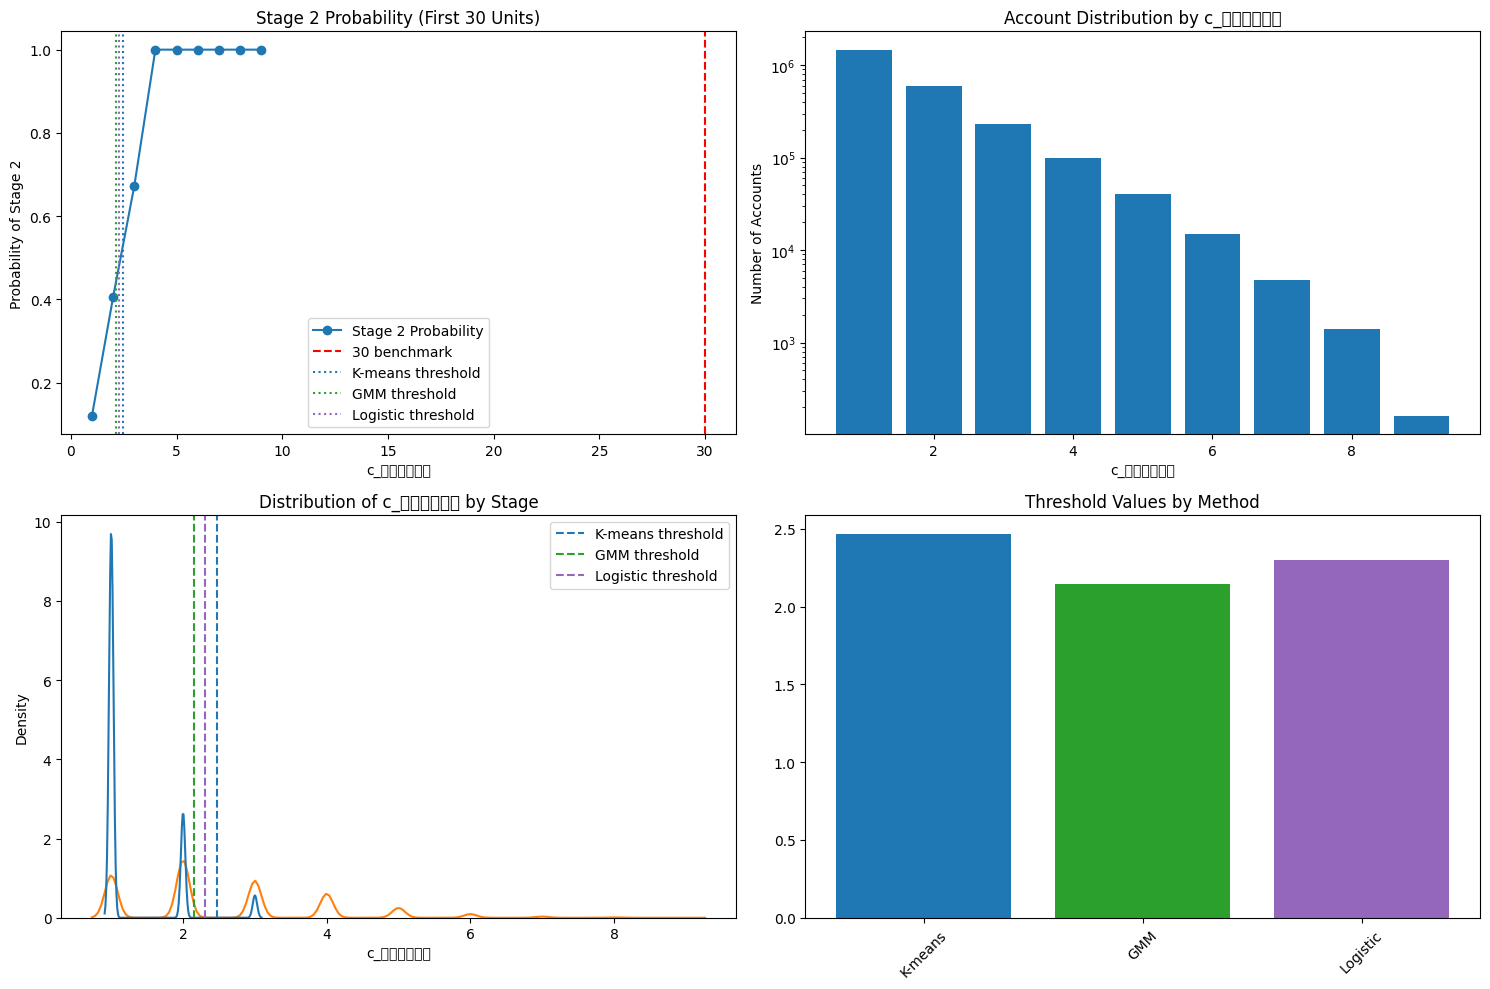


Summary Statistics for c_신용등급변화:
                 count      mean       std  min  25%  50%  75%  max
STAGE분류구분코드                                                        
1            1723535.0  1.291553  0.542024  1.0  1.0  1.0  1.0  3.0
2             731960.0  2.535096  1.334049  1.0  2.0  2.0  3.0  9.0


In [8]:
# Analysis of c_신용등급변화 threshold for retail loans

# Prepare data
data = merged_retail[merged_retail['c_신용등급변화'] > 0]

X = data['c_신용등급변화'].values.reshape(-1, 1)
y = (data['STAGE분류구분코드'] == '2').astype(int)

# 1. K-means Clustering
def find_threshold_kmeans(X):
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_.flatten()
    threshold = np.mean(centers)
    return threshold, kmeans

# 2. Gaussian Mixture Model
def find_threshold_gmm(X):
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm.fit(X)
    centers = gmm.means_.flatten()
    threshold = np.mean(centers)  # Use mean of centers as threshold
    return threshold, gmm

# 3. Logistic Regression
def find_threshold_logistic(X, y):
    lr = LogisticRegression(random_state=42)
    lr.fit(X, y)
    coef = lr.coef_[0][0]
    threshold = -lr.intercept_[0] / coef  # Find decision boundary
    coef_sign = np.sign(coef)
    return threshold, lr, coef_sign

# # 4. ROC Curve Analysis
# def find_threshold_roc(X, y):
#     # Sort unique values for potential thresholds
#     thresholds = np.sort(np.unique(X))
    
#     # Calculate ROC curve
#     fpr, tpr, threshold_values = roc_curve(y, X)
    
#     # Find optimal threshold using Youden's J statistic
#     j_scores = tpr - fpr
#     optimal_idx = np.argmax(j_scores)
#     threshold = threshold_values[optimal_idx]
    
#     return threshold, (fpr, tpr, threshold_values)

# Apply all methods
kmeans_threshold, kmeans_model = find_threshold_kmeans(X)
gmm_threshold, gmm_model = find_threshold_gmm(X)
logistic_threshold, logistic_model, logistic_sign = find_threshold_logistic(X, y)
# roc_threshold, roc_results = find_threshold_roc(X, y)

# Evaluate all methods
def evaluate_threshold(X, y, threshold, method_name, *, coef_sign=1):
    X = np.asarray(X).ravel()
    y_pred = (X > threshold if coef_sign > 0 else (X < threshold))
    auc = roc_auc_score(y, y_pred)
    
    # Calculate additional metrics
    tp = np.sum((y == 1) & (y_pred == 1))
    fp = np.sum((y == 0) & (y_pred == 1))
    tn = np.sum((y == 0) & (y_pred == 0))
    fn = np.sum((y == 1) & (y_pred == 0))
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    print(f"\n{method_name} Results:")
    print(f"Threshold: {threshold:.3f}")
    print(f"AUC: {auc:.3f}")
    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print(f"Precision: {precision:.3f}")
    
    return {
        'threshold': threshold,
        'auc': auc,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision
    }

# Evaluate all methods
results = {}
results['K-means'] = evaluate_threshold(X, y, kmeans_threshold, 'K-means')
results['GMM'] = evaluate_threshold(X, y, gmm_threshold, 'Gaussian Mixture Model')
results['Logistic'] = evaluate_threshold(X, y, logistic_threshold, 'Logistic Regression', coef_sign=logistic_sign)
# results['ROC'] = evaluate_threshold(X, y, roc_threshold, 'ROC Curve')

# Analyze risk factors transitions
risk_analysis   = []          # for bar chart
stage2_probs    = []          # y‑axis for probability line
account_counts  = []          # optional, retained for completeness

risk_values = sorted(data['c_신용등급변화'].unique())

for v in risk_values:
    mask       = data['c_신용등급변화'] == v
    n_accounts = mask.sum()
    if n_accounts == 0:
        continue
    stage2_cnt = ((data['STAGE분류구분코드'] == '2') & mask).sum()

    # line‑plot arrays
    stage2_probs   .append(stage2_cnt / n_accounts)
    account_counts .append(n_accounts)

    # bar‑chart DataFrame (≥100 rule copied from 연체일수 script)
    if n_accounts >= 100:
        risk_analysis.append({
            'risk'           : v,
            'total_accounts' : int(n_accounts),
            'stage2_count'   : int(stage2_cnt),
            'stage2_prob'    : stage2_cnt / n_accounts,
        })

risk_df = pd.DataFrame(risk_analysis)

# Visualization
plt.figure(figsize=(15, 10))

threshold_colors = {
    'K-means'  : 'tab:blue',
    'GMM'      : 'tab:green',
    'Logistic' : 'tab:purple',
    'ROC'      : 'tab:orange',
}


# --- (1,1) Stage‑2 probability for first 30 unique values ------
plt.subplot(2, 2, 1)
plt.plot(risk_values[:30], stage2_probs[:30],
         marker='o', label='Stage 2 Probability')
plt.axvline(x=30, color='r', ls='--', label='30 benchmark')
for m, r in results.items():
    if r['threshold'] <= 30:
        plt.axvline(r['threshold'], ls=':', color=threshold_colors[m],
                    label=f'{m} threshold')
plt.title('Stage 2 Probability (First 30 Units)')
plt.xlabel('c_신용등급변화')
plt.ylabel('Probability of Stage 2')
plt.legend()

# --- (1,2) Account distribution (log y‑scale) ------------------
plt.subplot(2, 2, 2)
plt.bar(risk_df['risk'], risk_df['total_accounts'])
plt.yscale('log')
plt.title('Account Distribution by c_신용등급변화')
plt.xlabel('c_신용등급변화')
plt.ylabel('Number of Accounts')

# --- (2,1) KDE by stage with coloured thresholds ---------------
plt.subplot(2, 2, 3)
sns.kdeplot(data=data, x='c_신용등급변화',
            hue='STAGE분류구분코드', common_norm=False)
for m, r in results.items():
    plt.axvline(r['threshold'], ls='--', color=threshold_colors[m],
                label=f'{m} threshold')
plt.title('Distribution of c_신용등급변화 by Stage')
plt.legend()

# --- (2,2) Threshold values per method -------------------------
plt.subplot(2, 2, 4)
plt.bar(results.keys(), [r['threshold'] for r in results.values()],
        color=[threshold_colors[k] for k in results.keys()])
plt.title('Threshold Values by Method')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for c_신용등급변화:")
print(data.groupby('STAGE분류구분코드')['c_신용등급변화'].describe())

# summary_thresholds
thresholds_in_order = [results['K-means']['threshold'],
                       results['GMM']['threshold'],
                       results['Logistic']['threshold']]
append_threshold_record(category   = 'retail',          
                        risk_factor= 'c_신용등급변화',  
                        thresholds = thresholds_in_order)

#### 연체일수


K-means Results:
Threshold: 13.745
AUC: 0.526
Sensitivity: 0.053
Specificity: 1.000
Precision: 0.938

Gaussian Mixture Model Results:
Threshold: 9.374
AUC: 0.529
Sensitivity: 0.059
Specificity: 1.000
Precision: 0.927

Logistic Regression Results:
Threshold: 8.673
AUC: 0.530
Sensitivity: 0.060
Specificity: 1.000
Precision: 0.923


C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\503051915.py:169: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\503051915.py:169: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\503051915.py:169: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\503051915.py:169: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\503051915.py:169: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\503051915.py:169: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing

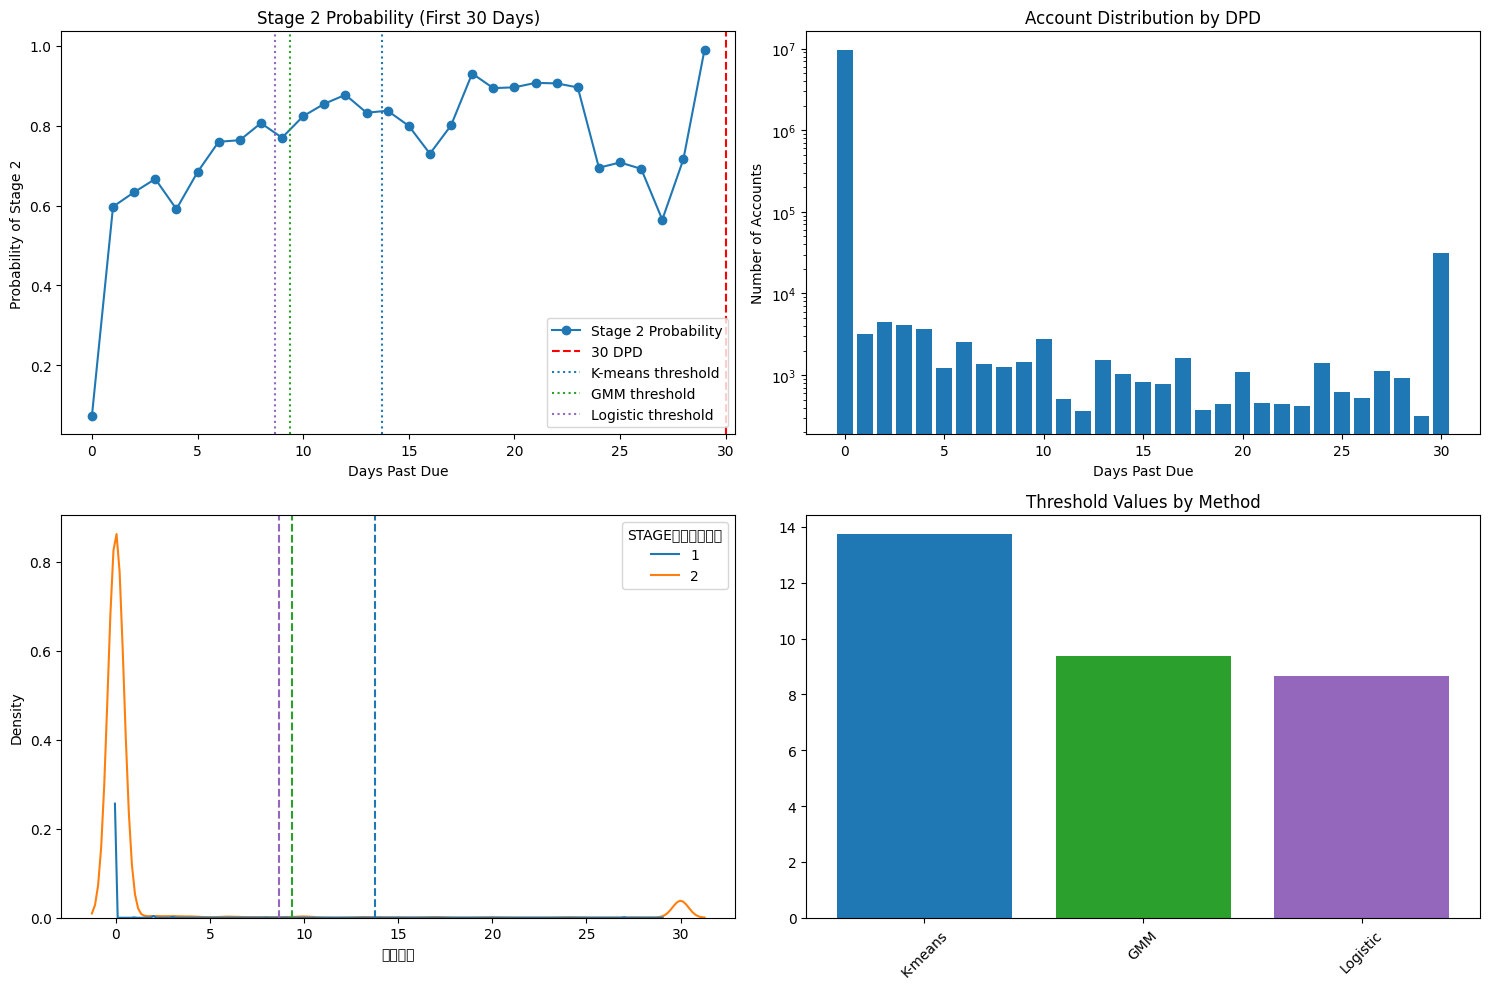


Summary Statistics for 연체일수:
                 count      mean       std  min  25%  50%  75%   max
STAGE분류구분코드                                                         
1            9012629.0  0.010738  0.424709  0.0  0.0  0.0  0.0  29.0
2             770462.0  1.629508  6.392856  0.0  0.0  0.0  0.0  30.0


In [9]:
# Analysis of 연체일수 weighted threshold for retail loans

# Prepare data
data = merged_retail[merged_retail['연체일수'] >= 0]
data.loc[data['연체일수'] >= 30, '연체일수'] = 30

X = data['연체일수'].values.reshape(-1, 1)
y = (data['STAGE분류구분코드'] == '2').astype(int)

# 1. K-means Clustering
def find_threshold_kmeans(X):
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_.flatten()
    threshold = np.mean(centers)
    return threshold, kmeans

# 2. Gaussian Mixture Model
def find_threshold_gmm(X):
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm.fit(X)
    centers = gmm.means_.flatten()
    threshold = np.mean(centers)  # Use mean of centers as threshold
    return threshold, gmm

# 3. Logistic Regression
def find_threshold_logistic(X, y):
    lr = LogisticRegression(random_state=42)
    lr.fit(X, y)
    threshold = -lr.intercept_[0] / lr.coef_[0][0]  # Find decision boundary
    return threshold, lr

# # 4. ROC Curve Analysis
# def find_threshold_roc(X, y):
#     # Sort unique values for potential thresholds
#     thresholds = np.sort(np.unique(X))
    
#     # Calculate ROC curve
#     fpr, tpr, threshold_values = roc_curve(y, X)
    
#     # Find optimal threshold using Youden's J statistic
#     j_scores = tpr - fpr
#     optimal_idx = np.argmax(j_scores)
#     threshold = threshold_values[optimal_idx]
    
#     return threshold, (fpr, tpr, threshold_values)

# Apply all methods
kmeans_threshold, kmeans_model = find_threshold_kmeans(X)
gmm_threshold, gmm_model = find_threshold_gmm(X)
logistic_threshold, logistic_model = find_threshold_logistic(X, y)
# roc_threshold, roc_results = find_threshold_roc(X, y)

# Evaluate all methods
def evaluate_threshold(X, y, threshold, method_name):
    y_pred = (np.asarray(X).ravel() > threshold)
    auc = roc_auc_score(y, y_pred)
    
    # Calculate additional metrics
    tp = np.sum((y == 1) & (y_pred == 1))
    fp = np.sum((y == 0) & (y_pred == 1))
    tn = np.sum((y == 0) & (y_pred == 0))
    fn = np.sum((y == 1) & (y_pred == 0))
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    print(f"\n{method_name} Results:")
    print(f"Threshold: {threshold:.3f}")
    print(f"AUC: {auc:.3f}")
    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print(f"Precision: {precision:.3f}")
    
    return {
        'threshold': threshold,
        'auc': auc,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision
    }

# Evaluate all methods
results = {}
results['K-means'] = evaluate_threshold(X, y, kmeans_threshold, 'K-means')
results['GMM'] = evaluate_threshold(X, y, gmm_threshold, 'Gaussian Mixture Model')
results['Logistic'] = evaluate_threshold(X, y, logistic_threshold, 'Logistic Regression')
# results['ROC'] = evaluate_threshold(X, y, roc_threshold, 'ROC Curve')

# Analyze risk factor transitions
risk_analysis   = []          # for Plot 2
stage2_probs    = []          # for Plot 1
account_counts  = []          # for Plot 1

risk_values = sorted(data['연체일수'].unique())

for risk in risk_values:
    mask           = data['연체일수'] == risk
    n_accounts     = mask.sum()

    # ---- Plot‑1 arrays ----
    if n_accounts:                           
        stage2_cnt = ((data['STAGE분류구분코드'] == '2') & mask).sum()
        stage2_probs  .append(stage2_cnt / n_accounts)
        account_counts.append(n_accounts)

    # ---- Plot‑2 frame ----------
    if n_accounts >= 100:                   
        risk_analysis.append({
            'risk'           : risk,
            'total_accounts' : int(n_accounts),
            'stage2_count'   : int(stage2_cnt),
            'stage2_prob'    : stage2_cnt / n_accounts,
        })

risk_df = pd.DataFrame(risk_analysis)      

# Visualization
plt.figure(figsize=(15, 10))

threshold_colors = {
    'K-means'  : 'tab:blue',     # or any Matplotlib‑named colors you like
    'GMM'      : 'tab:green',
    'Logistic' : 'tab:purple',
    'ROC'      : 'tab:orange',
}

# --- (1,1) Stage‑2 probability, first 30 days ----------------
plt.subplot(2, 2, 1)
plt.plot(risk_values[:30], stage2_probs[:30],
         marker='o', label='Stage 2 Probability')
plt.axvline(x=30, color='r', ls='--', label='30 DPD')

for m, r in results.items():
    if r['threshold'] <= 30:
        plt.axvline(r['threshold'], ls=':', color=threshold_colors[m],
                    label=f'{m} threshold')

plt.title('Stage 2 Probability (First 30 Days)')
plt.xlabel('Days Past Due')
plt.ylabel('Probability of Stage 2')
plt.legend()

# --- (1,2) Account distribution (log‑scale) -------------------
plt.subplot(2, 2, 2)
plt.bar(risk_df['risk'], risk_df['total_accounts'])
plt.yscale('log')
plt.title('Account Distribution by DPD')
plt.xlabel('Days Past Due')
plt.ylabel('Number of Accounts')

# --- (2,1) KDE distribution by stage --------------------------
plt.subplot(2, 2, 3)
sns.kdeplot(data=data, x='연체일수',
            hue='STAGE분류구분코드', common_norm=False)

for m, r in results.items():
    plt.axvline(r['threshold'], ls='--', color=threshold_colors[m],
                label=f'{m} threshold')

# --- (2,2) Threshold values per method ------------------------
plt.subplot(2, 2, 4)
plt.bar(results.keys(), [r['threshold'] for r in results.values()],
        color=[threshold_colors[k] for k in results.keys()])
plt.title('Threshold Values by Method')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for 연체일수:")
print(data.groupby('STAGE분류구분코드')['연체일수'].describe())


# summary_thresholds
thresholds_in_order = [results['K-means']['threshold'],
                       results['GMM']['threshold'],
                       results['Logistic']['threshold']]
append_threshold_record(category   = 'retail',          
                        risk_factor= '연체일수',  
                        thresholds = thresholds_in_order)

#### Classifier Enhanced

Categorical Variable: Random Forext
<br>
Numerical Variable: Logistic Regression

In [10]:
# Jump 있는 계좌

period_order = [202306, 202309, 202312, 202403, 202406, 202409, 202412, 202503, 202506]
idx_map = {p: i for i, p in enumerate(period_order)}

def has_jump(periods):
    idx = sorted(idx_map[p] for p in periods)
    return any(b - a > 1 for a, b in zip(idx, idx[1:]))

jump_accounts = (
    merged[
        (merged['계정과목명'] != '신용카드채권') 
        # & ((loan['EAD1금액'] != 0) | (loan['EAD2금액'] != 0) | (loan['EAD3금액'] != 0) | (loan['EAD4금액'] != 0) | (loan['EAD5금액'] != 0) | (loan['EAD6금액'] != 0))
    ].groupby('계좌번호')['기준년월']
        .apply(list)
        .loc[lambda s: s.apply(has_jump)]
        .reset_index()
)

# 분석 대상 자료 추출
a = merged['계정과목명']!='신용카드채권'
b = merged['계좌번호'].isin(jump_accounts['계좌번호'].tolist())==False
c = merged['c_EAD합'] > 0
d = merged['소매여부'] == 'Y'
merged_rtl = merged[a&b&c&d]

# Stage 1 to 2 or 3 (전체 분기 대상)
merged_rtl['기준일'] = pd.to_datetime(merged_rtl['기준년월'], format='%Y%m')
merged_rtl['1기STAGE'] = merged_rtl[['기준일','계좌번호','BS계정과목코드','c_order','STAGE분류구분코드']].groupby(['계좌번호','BS계정과목코드','c_order'])['STAGE분류구분코드'].shift(-1)
merged_rtl['2기STAGE'] = merged_rtl[['기준일','계좌번호','BS계정과목코드','c_order','STAGE분류구분코드']].groupby(['계좌번호','BS계정과목코드','c_order'])['STAGE분류구분코드'].shift(-2)
merged_rtl['3기STAGE'] = merged_rtl[['기준일','계좌번호','BS계정과목코드','c_order','STAGE분류구분코드']].groupby(['계좌번호','BS계정과목코드','c_order'])['STAGE분류구분코드'].shift(-3)
merged_rtl['4기STAGE'] = merged_rtl[['기준일','계좌번호','BS계정과목코드','c_order','STAGE분류구분코드']].groupby(['계좌번호','BS계정과목코드','c_order'])['STAGE분류구분코드'].shift(-4)

# Stage 하락 encoding
merged_rtl = merged_rtl[merged_rtl['STAGE분류구분코드']=='1']
merged_rtl['STAGE하락'] = np.nan
merged_rtl.loc[(merged_rtl['1기STAGE']=='1')|(merged_rtl['2기STAGE']=='1')|(merged_rtl['3기STAGE']=='1')|(merged_rtl['4기STAGE']=='1'),'STAGE하락'] = 0
merged_rtl.loc[merged_rtl['1기STAGE'].isin(['2','3']),'STAGE하락'] = 1
merged_rtl.loc[merged_rtl['2기STAGE'].isin(['2','3']),'STAGE하락'] = 1
merged_rtl.loc[merged_rtl['3기STAGE'].isin(['2','3']),'STAGE하락'] = 1
merged_rtl.loc[merged_rtl['4기STAGE'].isin(['2','3']),'STAGE하락'] = 1
merged_rtl['STAGE하락'].value_counts(dropna=False)

data_rtl = merged_rtl[(merged_rtl['기준년월'].isin(period_order[:-4]))&(merged_rtl['STAGE하락'].isna()==False)].copy()

C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\1713769386.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_rtl['기준일'] = pd.to_datetime(merged_rtl['기준년월'], format='%Y%m')
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\1713769386.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_rtl['1기STAGE'] = merged_rtl[['기준일','계좌번호','BS계정과목코드','c_order','STAGE분류구분코드']].groupby(['계좌번호','BS계정과목코드','c_order'])['STAGE분류구분코드'].shift(-1)
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\1713769386.

In [11]:
# 변수 성격별 컬럼 구분
catcols_with_order_rtl = ['당기말신용등급숫자','전기말신용등급숫자','최초신용등급숫자']
catcols_wo_order_rtl = ['연체여부','부도고객여부','금융보증계약여부','담보여부',
                        '난내난외구분코드','상환방법구분코드']
catcols_rtl_org = catcols_with_order_rtl+catcols_wo_order_rtl
lincols_rtl_org = ['유효이자율','연체일수','c_신용등급변화']

# 카테고리형 자료 자료형 수치화
data_rtl[catcols_rtl_org] = data_rtl[catcols_rtl_org].astype('category')
data_rtl[catcols_rtl_org] = data_rtl[catcols_rtl_org].apply(lambda x: x.cat.codes)

print(f'Full Data: {len(data_rtl):,}')
print(f'Drop Null: {len(data_rtl[catcols_rtl_org+lincols_rtl_org+['STAGE하락']].dropna()):,}')
print(f'Surv.Rate: {len(data_rtl[catcols_rtl_org+lincols_rtl_org+['STAGE하락']].dropna())/len(data_rtl)*100:.2f}%')

data_rtl = data_rtl[catcols_rtl_org+lincols_rtl_org+['STAGE하락']].dropna()

# 수치형 자료 Normalization
# Variable with high skewness - Log Transformation
def norm(srs):
    srs = (srs-min(srs))/(max(srs)-min(srs))
    series = np.exp(srs).div(1+np.exp(srs))
    return series
for x in lincols_rtl_org:
    data_rtl[x] = norm(data_rtl[x])
    _, p = stats.skewtest(data_rtl[x])
    if p < 0.05:
        data_rtl[x] = np.log(data_rtl[x])

Full Data: 1,512,049
Drop Null: 1,512,049
Surv.Rate: 100.00%


유의미한 변수 추출

In [12]:
# 수치형 자료
# 개별 변수 평가 (Reward: high correlation with 'STAGE하락', Punish: high correlation with other variables)
corr_mat = data_rtl[catcols_with_order_rtl+lincols_rtl_org+['STAGE하락']].corr()
score_mat = pd.DataFrame(index=catcols_with_order_rtl+lincols_rtl_org, columns=['STAGE하락','최대다중공선성','점수'])
for x in catcols_with_order_rtl+lincols_rtl_org:
    score_mat.loc[x,'STAGE하락'] = corr_mat.loc[x,'STAGE하락']
    score_mat.loc[x,'최대다중공선성'] = corr_mat.loc[x,catcols_with_order_rtl+lincols_rtl_org].nlargest(2).iloc[-1]
score_mat['점수'] = abs(score_mat['STAGE하락'].div(score_mat['최대다중공선성']))
score_mat = score_mat.sort_values('점수',ascending=False)
# score_mat

# 점수 기준 0.01 이상 변수 확인
lincols_rtl = score_mat[score_mat['점수']>.01].index.tolist()
lincols_rtl

# 다중공선성 재평가
corr_mat = data_rtl[lincols_rtl+['STAGE하락']].corr()
score_mat = pd.DataFrame(index=lincols_rtl, columns=['STAGE하락','최대다중공선성','점수'])
for x in lincols_rtl:
    score_mat.loc[x,'STAGE하락'] = corr_mat.loc[x,'STAGE하락']
    score_mat.loc[x,'최대다중공선성'] = corr_mat.loc[x,lincols_rtl].nlargest(2).iloc[-1]
score_mat['점수'] = abs(score_mat['STAGE하락'].div(score_mat['최대다중공선성']))
score_mat = score_mat.sort_values('점수',ascending=False)
# score_mat

# 점수 기준 0.1 이상 변수 선정
lincols_rtl = score_mat[score_mat['점수']>.1].index.tolist()
lincols_rtl


['연체일수', 'c_신용등급변화', '당기말신용등급숫자', '유효이자율', '최초신용등급숫자', '전기말신용등급숫자']

In [13]:
# 단순카테고리형 변수 t-test
treated = data_rtl[data_rtl['STAGE하락']==1]
control = data_rtl[data_rtl['STAGE하락']==0]
cat_var_ttest = pd.DataFrame(index=catcols_wo_order_rtl, columns=['T_mean','C_mean','p-value'])
for x in catcols_wo_order_rtl:
    _, p = stats.ttest_ind(treated[x], control[x])
    cat_var_ttest.loc[x] = [treated[x].mean(), control[x].mean(), p]
cat_var_ttest = cat_var_ttest.sort_values('p-value',ascending=True)
# cat_var_ttest

# p-value 0.05 미만 변수 사용
catcols_rtl = cat_var_ttest[cat_var_ttest['p-value']<0.05].index.tolist()

최종 데이터셋 정리 및 학습데이터 구분

In [14]:
# 소매 데이터셋 확정
data_rtl = data_rtl[lincols_rtl+catcols_rtl+['STAGE하락']]

# Drop features to avoid singular matrix
selector = VarianceThreshold(threshold=0.0)
data_nonsingular_rtl = selector.fit_transform(data_rtl[catcols_rtl+lincols_rtl])
data_nonsingular_rtl = pd.DataFrame(data_nonsingular_rtl, index=data_rtl.index, columns=selector.get_feature_names_out())
print('Original: ',data_rtl.shape[1])
print('Trimmed: ',data_nonsingular_rtl.shape[1])
print('Dropped column: ', list(set(data_rtl.columns)-set(selector.get_feature_names_out())))

# Split Data (Training, Cross-validation, Predict)
X_train_rtl, X_test_rtl, y_train_rtl, y_test_rtl = train_test_split(data_nonsingular_rtl,data_rtl['STAGE하락'], test_size=0.3, random_state=42)
X_tr_rtl, X_cv_rtl, y_tr_rtl, y_cv_rtl = train_test_split(X_train_rtl,y_train_rtl, test_size=0.3, random_state=42)

Original:  12
Trimmed:  11
Dropped column:  ['STAGE하락']


##### 주요 변수 추출
2차에 걸친 Logistic Regression을 통해 p-value가 높은 변수만 사용

In [15]:
# Logistic Regression 1
X_with_const = X_tr_rtl.copy()
X_with_const['intercept'] = 1
model_logit = sm.Logit(y_tr_rtl, X_with_const).fit(method='bfgs', maxiter=100)
# print(model_logit.summary())

# Extract the most significant ind. variables as candidate variables of interest
result_df = model_logit.summary2().tables[1]
cand_vars_rtl = result_df[result_df['P>|z|']<.05].index.tolist()

if 'intercept' not in cand_vars_rtl:
    cand_vars_rtl.append('intercept')

# Predict again only with cand_vars
model_logit_core_rtl = sm.Logit(y_tr_rtl, X_with_const[cand_vars_rtl]).fit(method='bfgs', maxiter=100)
X_test_w_const_rtl = X_test_rtl.copy()
X_test_w_const_rtl['intercept'] = 1
y_prob_rtl = model_logit_core_rtl.predict(X_test_w_const_rtl[cand_vars_rtl])
threshold_logit_rtl = np.percentile(y_prob_rtl,(1-len(y_tr_rtl[y_tr_rtl==1])/len(y_tr_rtl))*100)
# print(model_logit_core_rtl.summary())

result_df = model_logit_core_rtl.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.302113
         Iterations: 76
         Function evaluations: 78
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 0.302107
         Iterations: 57
         Function evaluations: 60
         Gradient evaluations: 60


##### Random Forest + Logit

In [16]:
# Random Forest
catcols_rtl = [x for x in catcols_wo_order_rtl if x in cand_vars_rtl]
clf_rtl = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf_rtl.fit(X_tr_rtl[catcols_rtl], y_tr_rtl)

# Logistic Regression with RF
lincols_rtl = [x for x in lincols_rtl if x in cand_vars_rtl]
X_tr_w_pred = X_tr_rtl[lincols_rtl].copy()
X_tr_w_pred['intercept'] = 1
X_tr_w_pred['cat_pred'] = clf_rtl.predict(X_tr_rtl[catcols_rtl])
model_logit_rf_rtl = sm.Logit(y_tr_rtl,X_tr_w_pred).fit(method='bfgs', maxiter=100)
y_pred_rf = clf_rtl.predict(X_test_rtl[catcols_rtl])
X_test_w_const_rtl['cat_pred'] = y_pred_rf
y_pred_rtl = model_logit_rf_rtl.predict(X_test_w_const_rtl[lincols_rtl+['intercept','cat_pred']])
threshold_rf_rtl = np.percentile(y_pred_rtl,(1-len(y_tr_rtl[y_tr_rtl==1])/len(y_tr_rtl))*100)
y_pred_rtl = (y_pred_rtl > threshold_rf_rtl).astype(int)
print("Accuracy: ", accuracy_score(y_test_rtl, y_pred_rtl))

Optimization terminated successfully.
         Current function value: 0.302776
         Iterations: 48
         Function evaluations: 50
         Gradient evaluations: 50
Accuracy:  0.851451120443548


In [17]:
del(merged_rtl, X_tr_rtl, X_test_rtl, X_cv_rtl, X_with_const, X_tr_w_pred, X_test_w_const_rtl, y_test_rtl, y_pred_rtl, data_rtl)

### NRetail

In [18]:
print("Data shape:", merged_nretail.shape)
print("\nValue counts of STAGE분류구분코드:")
print(merged_nretail['STAGE분류구분코드'].value_counts())

print("\연체일수 statistics:")
print(merged_nretail[ '연체일수'].describe())

print("\nMissing values:")
print(merged_nretail[['c_신용등급변화', 'STAGE분류구분코드', '연체일수']].isnull().sum())

print("\nInfinite values:")
print(np.isinf(merged_nretail['연체일수']).sum())


Data shape: (1001789, 18)

Value counts of STAGE분류구분코드:
STAGE분류구분코드
1    727464
2    274325
Name: count, dtype: int64
\연체일수 statistics:
count    1.001789e+06
mean     1.188823e-01
std      2.374238e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.700000e+01
Name: 연체일수, dtype: float64

Missing values:
c_신용등급변화       0
STAGE분류구분코드    0
연체일수           0
dtype: int64

Infinite values:
0


#### c_신용등급변화


K-means Results:
Threshold: 3.227
AUC: 0.581
Sensitivity: 0.161
Specificity: 1.000
Precision: 1.000

Gaussian Mixture Model Results:
Threshold: 2.273
AUC: 0.683
Sensitivity: 0.366
Specificity: 1.000
Precision: 1.000

Logistic Regression Results:
Threshold: 1.265
AUC: 0.792
Sensitivity: 0.702
Specificity: 0.882
Precision: 0.907


C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\2336414521.py:172: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\2336414521.py:172: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\2336414521.py:172: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\2336414521.py:172: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\2336414521.py:172: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\2336414521.py:172: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE

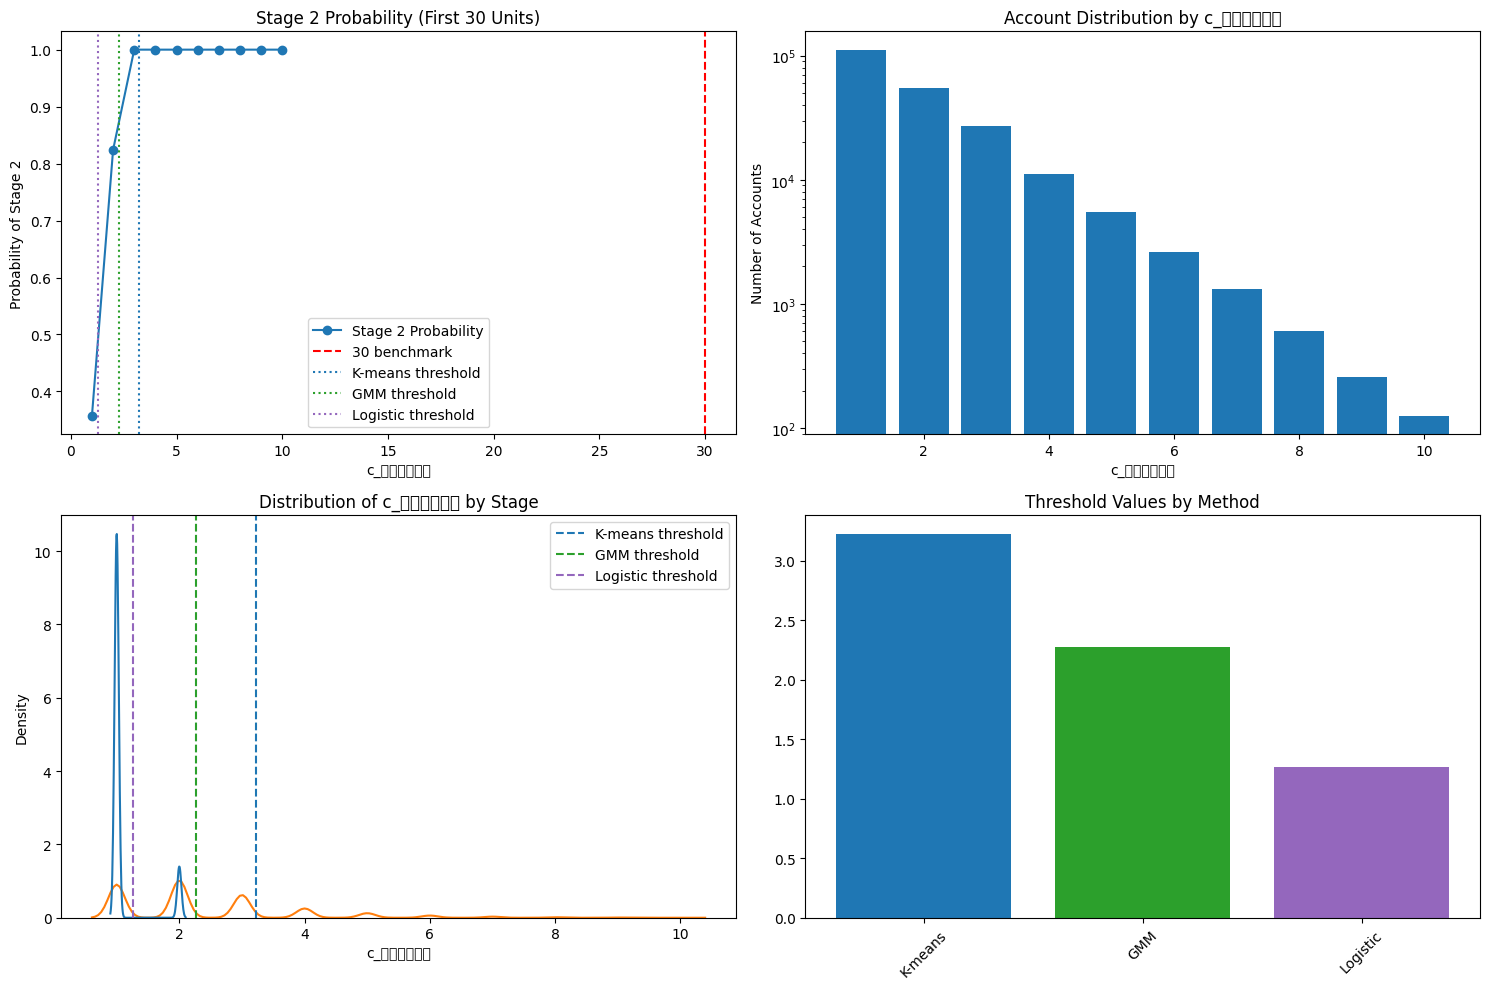


Summary Statistics for c_신용등급변화:
                count      mean       std  min  25%  50%  75%   max
STAGE분류구분코드                                                        
1             81416.0  1.117692  0.322245  1.0  1.0  1.0  1.0   2.0
2            133689.0  2.372028  1.395205  1.0  1.0  2.0  3.0  10.0


In [19]:
# Analysis of c_신용등급변화 threshold for retail loans

# Prepare data
data = merged_nretail[merged_nretail['c_신용등급변화'] > 0]

X = data['c_신용등급변화'].values.reshape(-1, 1)
y = (data['STAGE분류구분코드'] == '2').astype(int)

# 1. K-means Clustering
def find_threshold_kmeans(X):
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_.flatten()
    threshold = np.mean(centers)
    return threshold, kmeans

# 2. Gaussian Mixture Model
def find_threshold_gmm(X):
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm.fit(X)
    centers = gmm.means_.flatten()
    threshold = np.mean(centers)  # Use mean of centers as threshold
    return threshold, gmm

# 3. Logistic Regression
def find_threshold_logistic(X, y):
    lr = LogisticRegression(random_state=42)
    lr.fit(X, y)
    coef = lr.coef_[0][0]
    threshold = -lr.intercept_[0] / coef  # Find decision boundary
    coef_sign = np.sign(coef)
    return threshold, lr, coef_sign

# # 4. ROC Curve Analysis
# def find_threshold_roc(X, y):
#     # Sort unique values for potential thresholds
#     thresholds = np.sort(np.unique(X))
    
#     # Calculate ROC curve
#     fpr, tpr, threshold_values = roc_curve(y, X)
    
#     # Find optimal threshold using Youden's J statistic
#     j_scores = tpr - fpr
#     optimal_idx = np.argmax(j_scores)
#     threshold = threshold_values[optimal_idx]
    
#     return threshold, (fpr, tpr, threshold_values)

# Apply all methods
kmeans_threshold, kmeans_model = find_threshold_kmeans(X)
gmm_threshold, gmm_model = find_threshold_gmm(X)
logistic_threshold, logistic_model, logistic_sign = find_threshold_logistic(X, y)
# roc_threshold, roc_results = find_threshold_roc(X, y)

# Evaluate all methods
def evaluate_threshold(X, y, threshold, method_name, *, coef_sign=1):
    X = np.asarray(X).ravel()
    y_pred = (X > threshold if coef_sign > 0 else (X < threshold))
    auc = roc_auc_score(y, y_pred)
    
    # Calculate additional metrics
    tp = np.sum((y == 1) & (y_pred == 1))
    fp = np.sum((y == 0) & (y_pred == 1))
    tn = np.sum((y == 0) & (y_pred == 0))
    fn = np.sum((y == 1) & (y_pred == 0))
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    print(f"\n{method_name} Results:")
    print(f"Threshold: {threshold:.3f}")
    print(f"AUC: {auc:.3f}")
    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print(f"Precision: {precision:.3f}")
    
    return {
        'threshold': threshold,
        'auc': auc,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision
    }

# Evaluate all methods
results = {}
results['K-means'] = evaluate_threshold(X, y, kmeans_threshold, 'K-means')
results['GMM'] = evaluate_threshold(X, y, gmm_threshold, 'Gaussian Mixture Model')
results['Logistic'] = evaluate_threshold(X, y, logistic_threshold, 'Logistic Regression', coef_sign=logistic_sign)
# results['ROC'] = evaluate_threshold(X, y, roc_threshold, 'ROC Curve')

# Analyze risk factors transitions
risk_analysis   = []          # for bar chart
stage2_probs    = []          # y‑axis for probability line
account_counts  = []          # optional, retained for completeness

risk_values = sorted(data['c_신용등급변화'].unique())

for v in risk_values:
    mask       = data['c_신용등급변화'] == v
    n_accounts = mask.sum()
    if n_accounts == 0:
        continue
    stage2_cnt = ((data['STAGE분류구분코드'] == '2') & mask).sum()

    # line‑plot arrays
    stage2_probs   .append(stage2_cnt / n_accounts)
    account_counts .append(n_accounts)

    # bar‑chart DataFrame (≥100 rule copied from 연체일수 script)
    if n_accounts >= 100:
        risk_analysis.append({
            'risk'           : v,
            'total_accounts' : int(n_accounts),
            'stage2_count'   : int(stage2_cnt),
            'stage2_prob'    : stage2_cnt / n_accounts,
        })

risk_df = pd.DataFrame(risk_analysis)

# Visualization
plt.figure(figsize=(15, 10))

threshold_colors = {
    'K-means'  : 'tab:blue',
    'GMM'      : 'tab:green',
    'Logistic' : 'tab:purple',
    'ROC'      : 'tab:orange',
}


# --- (1,1) Stage‑2 probability for first 30 unique values ------
plt.subplot(2, 2, 1)
plt.plot(risk_values[:30], stage2_probs[:30],
         marker='o', label='Stage 2 Probability')
plt.axvline(x=30, color='r', ls='--', label='30 benchmark')
for m, r in results.items():
    if r['threshold'] <= 30:
        plt.axvline(r['threshold'], ls=':', color=threshold_colors[m],
                    label=f'{m} threshold')
plt.title('Stage 2 Probability (First 30 Units)')
plt.xlabel('c_신용등급변화')
plt.ylabel('Probability of Stage 2')
plt.legend()

# --- (1,2) Account distribution (log y‑scale) ------------------
plt.subplot(2, 2, 2)
plt.bar(risk_df['risk'], risk_df['total_accounts'])
plt.yscale('log')
plt.title('Account Distribution by c_신용등급변화')
plt.xlabel('c_신용등급변화')
plt.ylabel('Number of Accounts')

# --- (2,1) KDE by stage with coloured thresholds ---------------
plt.subplot(2, 2, 3)
sns.kdeplot(data=data, x='c_신용등급변화',
            hue='STAGE분류구분코드', common_norm=False)
for m, r in results.items():
    plt.axvline(r['threshold'], ls='--', color=threshold_colors[m],
                label=f'{m} threshold')
plt.title('Distribution of c_신용등급변화 by Stage')
plt.legend()

# --- (2,2) Threshold values per method -------------------------
plt.subplot(2, 2, 4)
plt.bar(results.keys(), [r['threshold'] for r in results.values()],
        color=[threshold_colors[k] for k in results.keys()])
plt.title('Threshold Values by Method')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for c_신용등급변화:")
print(data.groupby('STAGE분류구분코드')['c_신용등급변화'].describe())


# summary_thresholds
thresholds_in_order = [results['K-means']['threshold'],
                       results['GMM']['threshold'],
                       results['Logistic']['threshold']]
append_threshold_record(category   = 'nretail',          
                        risk_factor= 'c_신용등급변화',  
                        thresholds = thresholds_in_order)

#### 연체일수


K-means Results:
Threshold: 13.812
AUC: 0.504
Sensitivity: 0.009
Specificity: 1.000
Precision: 0.968

Gaussian Mixture Model Results:
Threshold: 8.966
AUC: 0.505
Sensitivity: 0.010
Specificity: 1.000
Precision: 0.946

Logistic Regression Results:
Threshold: 4.518
AUC: 0.505
Sensitivity: 0.011
Specificity: 1.000
Precision: 0.917


C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\3480983435.py:169: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\3480983435.py:169: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\3480983435.py:169: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\3480983435.py:169: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\3480983435.py:169: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\3480983435.py:169: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) m

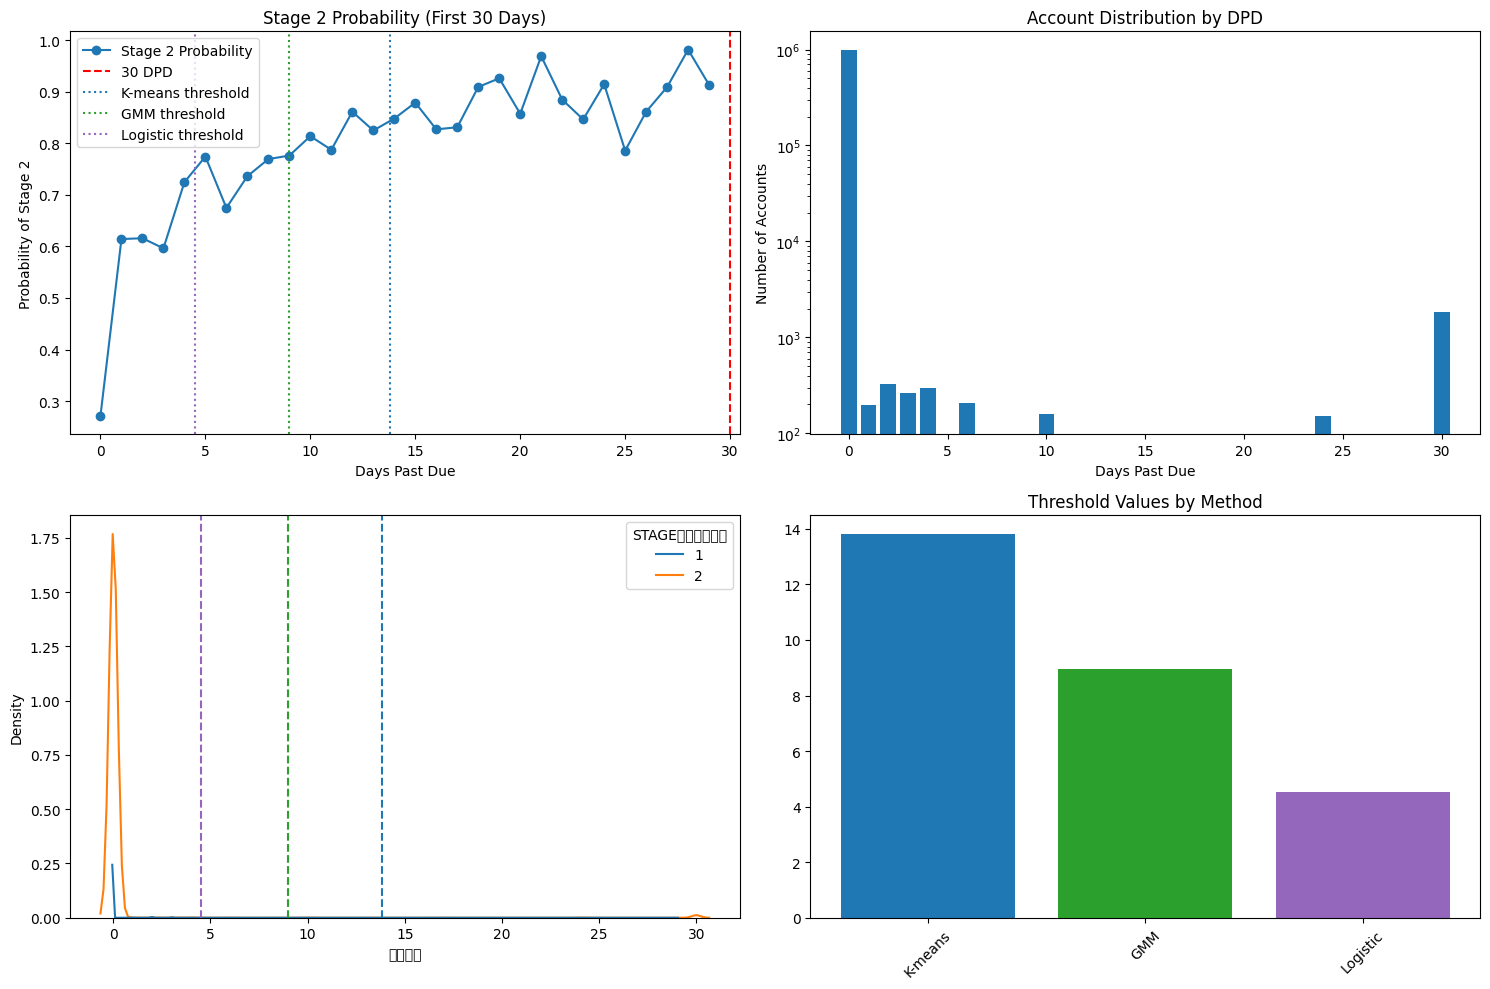


Summary Statistics for 연체일수:
                count      mean       std  min  25%  50%  75%   max
STAGE분류구분코드                                                        
1            727464.0  0.005842  0.269712  0.0  0.0  0.0  0.0  29.0
2            274325.0  0.277117  2.695293  0.0  0.0  0.0  0.0  30.0


In [20]:
# Analysis of 연체일수 weighted threshold for retail loans

# Prepare data
data = merged_nretail[merged_nretail['연체일수'] >= 0]
data.loc[data['연체일수'] >= 30, '연체일수'] = 30

X = data['연체일수'].values.reshape(-1, 1)
y = (data['STAGE분류구분코드'] == '2').astype(int)

# 1. K-means Clustering
def find_threshold_kmeans(X):
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_.flatten()
    threshold = np.mean(centers)
    return threshold, kmeans

# 2. Gaussian Mixture Model
def find_threshold_gmm(X):
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm.fit(X)
    centers = gmm.means_.flatten()
    threshold = np.mean(centers)  # Use mean of centers as threshold
    return threshold, gmm

# 3. Logistic Regression
def find_threshold_logistic(X, y):
    lr = LogisticRegression(random_state=42)
    lr.fit(X, y)
    threshold = -lr.intercept_[0] / lr.coef_[0][0]  # Find decision boundary
    return threshold, lr

# # 4. ROC Curve Analysis
# def find_threshold_roc(X, y):
#     # Sort unique values for potential thresholds
#     thresholds = np.sort(np.unique(X))
    
#     # Calculate ROC curve
#     fpr, tpr, threshold_values = roc_curve(y, X)
    
#     # Find optimal threshold using Youden's J statistic
#     j_scores = tpr - fpr
#     optimal_idx = np.argmax(j_scores)
#     threshold = threshold_values[optimal_idx]
    
#     return threshold, (fpr, tpr, threshold_values)

# Apply all methods
kmeans_threshold, kmeans_model = find_threshold_kmeans(X)
gmm_threshold, gmm_model = find_threshold_gmm(X)
logistic_threshold, logistic_model = find_threshold_logistic(X, y)
# roc_threshold, roc_results = find_threshold_roc(X, y)

# Evaluate all methods
def evaluate_threshold(X, y, threshold, method_name):
    y_pred = (np.asarray(X).ravel() > threshold)
    auc = roc_auc_score(y, y_pred)
    
    # Calculate additional metrics
    tp = np.sum((y == 1) & (y_pred == 1))
    fp = np.sum((y == 0) & (y_pred == 1))
    tn = np.sum((y == 0) & (y_pred == 0))
    fn = np.sum((y == 1) & (y_pred == 0))
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    print(f"\n{method_name} Results:")
    print(f"Threshold: {threshold:.3f}")
    print(f"AUC: {auc:.3f}")
    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print(f"Precision: {precision:.3f}")
    
    return {
        'threshold': threshold,
        'auc': auc,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision
    }

# Evaluate all methods
results = {}
results['K-means'] = evaluate_threshold(X, y, kmeans_threshold, 'K-means')
results['GMM'] = evaluate_threshold(X, y, gmm_threshold, 'Gaussian Mixture Model')
results['Logistic'] = evaluate_threshold(X, y, logistic_threshold, 'Logistic Regression')
# results['ROC'] = evaluate_threshold(X, y, roc_threshold, 'ROC Curve')

# Analyze risk factor transitions
risk_analysis   = []          # for Plot 2
stage2_probs    = []          # for Plot 1
account_counts  = []          # for Plot 1

risk_values = sorted(data['연체일수'].unique())

for risk in risk_values:
    mask           = data['연체일수'] == risk
    n_accounts     = mask.sum()

    # ---- Plot‑1 arrays ----
    if n_accounts:                           
        stage2_cnt = ((data['STAGE분류구분코드'] == '2') & mask).sum()
        stage2_probs  .append(stage2_cnt / n_accounts)
        account_counts.append(n_accounts)

    # ---- Plot‑2 frame ----------
    if n_accounts >= 100:                   
        risk_analysis.append({
            'risk'           : risk,
            'total_accounts' : int(n_accounts),
            'stage2_count'   : int(stage2_cnt),
            'stage2_prob'    : stage2_cnt / n_accounts,
        })

risk_df = pd.DataFrame(risk_analysis)      

# Visualization
plt.figure(figsize=(15, 10))

threshold_colors = {
    'K-means'  : 'tab:blue',     # or any Matplotlib‑named colors you like
    'GMM'      : 'tab:green',
    'Logistic' : 'tab:purple',
    'ROC'      : 'tab:orange',
}

# --- (1,1) Stage‑2 probability, first 30 days ----------------
plt.subplot(2, 2, 1)
plt.plot(risk_values[:30], stage2_probs[:30],
         marker='o', label='Stage 2 Probability')
plt.axvline(x=30, color='r', ls='--', label='30 DPD')

for m, r in results.items():
    if r['threshold'] <= 30:
        plt.axvline(r['threshold'], ls=':', color=threshold_colors[m],
                    label=f'{m} threshold')

plt.title('Stage 2 Probability (First 30 Days)')
plt.xlabel('Days Past Due')
plt.ylabel('Probability of Stage 2')
plt.legend()

# --- (1,2) Account distribution (log‑scale) -------------------
plt.subplot(2, 2, 2)
plt.bar(risk_df['risk'], risk_df['total_accounts'])
plt.yscale('log')
plt.title('Account Distribution by DPD')
plt.xlabel('Days Past Due')
plt.ylabel('Number of Accounts')

# --- (2,1) KDE distribution by stage --------------------------
plt.subplot(2, 2, 3)
sns.kdeplot(data=data, x='연체일수',
            hue='STAGE분류구분코드', common_norm=False)

for m, r in results.items():
    plt.axvline(r['threshold'], ls='--', color=threshold_colors[m],
                label=f'{m} threshold')

# --- (2,2) Threshold values per method ------------------------
plt.subplot(2, 2, 4)
plt.bar(results.keys(), [r['threshold'] for r in results.values()],
        color=[threshold_colors[k] for k in results.keys()])
plt.title('Threshold Values by Method')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for 연체일수:")
print(data.groupby('STAGE분류구분코드')['연체일수'].describe())


# summary_thresholds
thresholds_in_order = [results['K-means']['threshold'],
                       results['GMM']['threshold'],
                       results['Logistic']['threshold']]
append_threshold_record(category   = 'nretail',          
                        risk_factor= '연체일수',  
                        thresholds = thresholds_in_order)

#### Classifier Enhanced

In [21]:
# 분석 대상 자료 추출
a = merged['계정과목명']!='신용카드채권'
b = merged['계좌번호'].isin(jump_accounts['계좌번호'].tolist())==False
c = merged['c_EAD합'] > 0
d = merged['소매여부'] == 'N'
merged_cop = merged[a&b&c&d]

# Stage 1 to 2 or 3 (전체 분기 대상)
merged_cop['기준일'] = pd.to_datetime(merged_cop['기준년월'], format='%Y%m')
merged_cop['1기STAGE'] = merged_cop[['기준일','계좌번호','BS계정과목코드','c_order','STAGE분류구분코드']].groupby(['계좌번호','BS계정과목코드','c_order'])['STAGE분류구분코드'].shift(-1)
merged_cop['2기STAGE'] = merged_cop[['기준일','계좌번호','BS계정과목코드','c_order','STAGE분류구분코드']].groupby(['계좌번호','BS계정과목코드','c_order'])['STAGE분류구분코드'].shift(-2)
merged_cop['3기STAGE'] = merged_cop[['기준일','계좌번호','BS계정과목코드','c_order','STAGE분류구분코드']].groupby(['계좌번호','BS계정과목코드','c_order'])['STAGE분류구분코드'].shift(-3)
merged_cop['4기STAGE'] = merged_cop[['기준일','계좌번호','BS계정과목코드','c_order','STAGE분류구분코드']].groupby(['계좌번호','BS계정과목코드','c_order'])['STAGE분류구분코드'].shift(-4)

merged_cop = merged_cop[merged_cop['STAGE분류구분코드']=='1']
merged_cop['STAGE하락'] = np.nan
merged_cop.loc[(merged_cop['1기STAGE']=='1')|(merged_cop['2기STAGE']=='1')|(merged_cop['3기STAGE']=='1')|(merged_cop['4기STAGE']=='1'),'STAGE하락'] = 0
merged_cop.loc[merged_cop['1기STAGE'].isin(['2','3']),'STAGE하락'] = 1
merged_cop.loc[merged_cop['2기STAGE'].isin(['2','3']),'STAGE하락'] = 1
merged_cop.loc[merged_cop['3기STAGE'].isin(['2','3']),'STAGE하락'] = 1
merged_cop.loc[merged_cop['4기STAGE'].isin(['2','3']),'STAGE하락'] = 1
# merged_cop['STAGE하락'].value_counts(dropna=False)

data_cop = merged_cop[(merged_cop['기준년월'].isin(period_order[:-4]))&(merged_cop['STAGE하락'].isna()==False)].copy()

C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\1997707041.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cop['기준일'] = pd.to_datetime(merged_cop['기준년월'], format='%Y%m')
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\1997707041.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cop['1기STAGE'] = merged_cop[['기준일','계좌번호','BS계정과목코드','c_order','STAGE분류구분코드']].groupby(['계좌번호','BS계정과목코드','c_order'])['STAGE분류구분코드'].shift(-1)
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\1997707041.p

In [22]:
# 변수 성격별 컬럼 구분
catcols_with_order_cop = ['당기말신용등급숫자','전기말신용등급숫자','최초신용등급숫자']
catcols_wo_order_cop = ['산업분류코드','연체여부','금융보증계약여부','담보여부','난내난외구분코드',
                        '기업규모분류','론리뷰판정등급','조기경보','자본잠식여부','건전성분류요주의이하',
                        '상환방법구분코드']
catcols_cop_org = catcols_with_order_cop+catcols_wo_order_cop
lincols_cop_org = ['유효이자율','연체일수','이자보상배율_현재','이자보상배율_1년전','이자보상배율_2년전',
                   '영업활동현금흐름액_1기','영업활동현금흐름액_2기','영업활동현금흐름액_3기',
                   '당기이자지급후현금흐름','전기이자지급후현금흐름','전전기이자지급후현금흐름',
                   '당기순이익','전기순이익','전전기순이익','c_신용등급변화']
fin_col = ['이자보상배율_현재','이자보상배율_1년전','이자보상배율_2년전',
            '영업활동현금흐름액_1기','영업활동현금흐름액_2기','영업활동현금흐름액_3기',
            '당기이자지급후현금흐름','전기이자지급후현금흐름','전전기이자지급후현금흐름',
            '당기순이익','전기순이익','전전기순이익']
# 재무정보 0 자료 null 처리
for col in fin_col:
    data_cop.loc[data_cop[col]==0,col] = np.nan

# 카테고리형 자료 자료형 수치화
data_cop[catcols_cop_org] = data_cop[catcols_cop_org].astype('category')
data_cop[catcols_cop_org] = data_cop[catcols_cop_org].apply(lambda x: x.cat.codes)

print(f'Full Data: {len(data_cop):,}')
print(f'Drop Null: {len(data_cop[catcols_cop_org+lincols_cop_org+['STAGE하락']].dropna()):,}')
print(f'Surv.Rate: {len(data_cop[catcols_cop_org+lincols_cop_org+['STAGE하락']].dropna())/len(data_cop)*100:.2f}%')

data_cop = data_cop[catcols_cop_org+lincols_cop_org+['STAGE하락']].dropna()

# 수치형 자료 Normalization
# Variable with high skewness - Log Transformation
def norm(srs):
    srs = (srs-min(srs))/(max(srs)-min(srs))
    series = np.exp(srs).div(1+np.exp(srs))
    return series
for x in lincols_cop_org:
    data_cop[x] = norm(data_cop[x])
    _, p = stats.skewtest(data_cop[x])
    if p < 0.05:
        data_cop[x] = np.log(data_cop[x])

Full Data: 213,253
Drop Null: 170,758
Surv.Rate: 80.07%


유의미한 변수 추출

In [23]:
# 수치형 자료
# 개별 변수 평가 (Reward: high correlation with 'STAGE하락', Punish: high correlation with other variables)
corr_mat = data_cop[catcols_with_order_cop+lincols_cop_org+['STAGE하락']].corr()
score_mat = pd.DataFrame(index=catcols_with_order_cop+lincols_cop_org, columns=['STAGE하락','최대다중공선성','점수'])
for x in catcols_with_order_cop+lincols_cop_org:
    score_mat.loc[x,'STAGE하락'] = corr_mat.loc[x,'STAGE하락']
    score_mat.loc[x,'최대다중공선성'] = corr_mat.loc[x,catcols_with_order_cop+lincols_cop_org].nlargest(2).iloc[-1]
score_mat['점수'] = abs(score_mat['STAGE하락'].div(score_mat['최대다중공선성']))
score_mat = score_mat.sort_values('점수',ascending=False)
# score_mat

# 점수 기준 0.01 이상 변수 확인
lincols_cop = score_mat[score_mat['점수']>.01].index.tolist()
lincols_cop

# 다중공선성 재평가
corr_mat = data_cop[lincols_cop+['STAGE하락']].corr()
score_mat = pd.DataFrame(index=lincols_cop, columns=['STAGE하락','최대다중공선성','점수'])
for x in lincols_cop:
    score_mat.loc[x,'STAGE하락'] = corr_mat.loc[x,'STAGE하락']
    score_mat.loc[x,'최대다중공선성'] = corr_mat.loc[x,lincols_cop].nlargest(2).iloc[-1]
score_mat['점수'] = abs(score_mat['STAGE하락'].div(score_mat['최대다중공선성']))
score_mat = score_mat.sort_values('점수',ascending=False)
# score_mat

# 점수 기준 0.1 이상 변수 선정
lincols_cop = score_mat[score_mat['점수']>.1].index.tolist()
lincols_cop

['연체일수',
 '이자보상배율_1년전',
 '이자보상배율_2년전',
 '이자보상배율_현재',
 '유효이자율',
 '전기말신용등급숫자',
 '당기말신용등급숫자',
 '최초신용등급숫자',
 'c_신용등급변화']

In [24]:
# 단순카테고리형 변수 t-test
treated = data_cop[data_cop['STAGE하락']==1]
control = data_cop[data_cop['STAGE하락']==0]
cat_var_ttest = pd.DataFrame(index=catcols_wo_order_cop, columns=['T_mean','C_mean','p-value'])
for x in catcols_wo_order_cop:
    _, p = stats.ttest_ind(treated[x], control[x])
    cat_var_ttest.loc[x] = [treated[x].mean(), control[x].mean(), p]
cat_var_ttest = cat_var_ttest.sort_values('p-value',ascending=True)
# cat_var_ttest

# p-value 0.05 미만 변수 사용
catcols_cop = cat_var_ttest[cat_var_ttest['p-value']<0.05].index.tolist()

최종 데이터셋 정리 및 학습데이터 구분

In [25]:
# 기업 데이터셋 확정
data_cop = data_cop[lincols_cop+catcols_cop+['STAGE하락']]

# Drop features to avoid singular matrix
selector = VarianceThreshold(threshold=0.0)
data_nonsingular = selector.fit_transform(data_cop[catcols_cop+lincols_cop])
data_nonsingular = pd.DataFrame(data_nonsingular, index=data_cop.index, columns=selector.get_feature_names_out())

print('Original: ',data_cop.shape[1])
print('Trimmed: ',data_nonsingular.shape[1])
print('Dropped column: ', list(set(data_cop.columns)-set(selector.get_feature_names_out())))

# Split Data (Training, Cross-validation, Predict)
X_train_cop, X_test_cop, y_train_cop, y_test_cop = train_test_split(data_nonsingular,data_cop['STAGE하락'], test_size=0.3, random_state=42)
X_tr_cop, X_cv_cop, y_tr_cop, y_cv_cop = train_test_split(X_train_cop,y_train_cop, test_size=0.3, random_state=42)

Original:  19
Trimmed:  18
Dropped column:  ['STAGE하락']


##### 주요 변수 추출
2차에 걸친 Logistic Regression을 통해 p-value가 높은 변수만 사용

In [26]:
# Logistic Regression 1
X_with_const = X_tr_cop.copy()
X_with_const['intercept'] = 1
model_logit = sm.Logit(y_tr_cop, X_with_const).fit(method='bfgs', maxiter=100)
# print(model_logit.summary())

# Extract the most significant ind. variables as candidate variables of interest
result_df = model_logit.summary2().tables[1]
cand_vars_cop = result_df[result_df['P>|z|']<.05].index.tolist()

if 'intercept' not in cand_vars_cop:
    cand_vars_cop.append('intercept')

# Predict again only with cand_vars
model_logit_core_cop = sm.Logit(y_tr_cop, X_with_const[cand_vars_cop]).fit(method='bfgs', maxiter=100)
X_test_w_const_cop = X_test_cop.copy()
X_test_w_const_cop['intercept'] = 1
y_prob_cop = model_logit_core_cop.predict(X_test_w_const_cop[cand_vars_cop])
threshold_logit_cop = np.percentile(y_prob_cop,(1-len(y_tr_cop[y_tr_cop==1])/len(y_tr_cop))*100)
# print(model_logit_core_cop.summary())

result_df = model_logit_core_cop.summary2().tables[1]

C:\Users\GT492HL\AppData\Roaming\Python\Python313\site-packages\scipy\optimize\_optimize.py:1330: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
C:\Users\GT492HL\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.398389
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 103
         Current function value: 0.398416
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104


C:\Users\GT492HL\AppData\Roaming\Python\Python313\site-packages\scipy\optimize\_optimize.py:1330: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
C:\Users\GT492HL\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### Random Forest + Logit

In [27]:
# Random Forest
catcols_cop = [x for x in catcols_wo_order_cop if x in cand_vars_cop]
clf_cop = RandomForestClassifier(n_estimators=150, random_state=42)
clf_cop.fit(X_tr_cop[catcols_cop], y_tr_cop)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
# Logistic Regression with RF
lincols_cop = [x for x in lincols_cop if x in cand_vars_cop]
X_tr_w_pred = X_tr_cop[lincols_cop].copy()
X_tr_w_pred['intercept'] = 1
X_tr_w_pred['cat_pred'] = clf_cop.predict(X_tr_cop[catcols_cop])
model_logit_rf_cop = sm.Logit(y_tr_cop,X_tr_w_pred).fit(method='bfgs', maxiter=100)
y_pred_rf = clf_cop.predict(X_test_cop[catcols_cop])
X_test_w_const_cop['cat_pred'] = y_pred_rf
y_pred_cop = model_logit_rf_cop.predict(X_test_w_const_cop[lincols_cop+['intercept','cat_pred']])
threshold_rf_cop = np.percentile(y_pred_cop,(1-len(y_tr_cop[y_tr_cop==1])/len(y_tr_cop))*100)
y_pred_cop = (y_pred_cop > threshold_rf_cop).astype(int)
print("Accuracy: ", accuracy_score(y_test_cop, y_pred_cop))

Optimization terminated successfully.
         Current function value: 0.392637
         Iterations: 67
         Function evaluations: 71
         Gradient evaluations: 71
Accuracy:  0.79399937534161


In [29]:
del(merged_cop, X_tr_cop, X_test_cop, X_cv_cop, X_with_const, X_tr_w_pred, X_test_w_const_cop, y_test_cop, y_pred_cop, data_cop)

## Conclusion

### M1: Threshold 

In [30]:
summary_thresholds

,category,risk_factor,thresholds,mean
0,retail,c_신용등급변화,"[2.46712545006277, 2.147163530949652, 2.298439...",2.304243
1,retail,연체일수,"[13.745266107057423, 9.374389309682654, 8.6728...",10.597489
2,nretail,c_신용등급변화,"[3.2267761900145295, 2.273041526675983, 1.2653...",2.255053
3,nretail,연체일수,"[13.812464397937399, 8.966470861072427, 4.5179...",9.098952


In [31]:

a = merged['STAGE분류구분코드'] == '1'
b = merged['c_신용등급변화']   >= 2
c = merged['연체일수']        >= 10
mask = a & (b | c)                       # Stage‑1 and (risk1 or risk2)

quarters = (
    pd.to_datetime(merged['기준년월'].astype(str), format='%Y%m')
      .dt.to_period('Q')                 # e.g. 2024Q1
)

stage1_total_q = a.groupby(quarters).sum()
stage1_5_q     = mask.groupby(quarters).sum()

stage1_analysis_q = (
    pd.DataFrame({
        'total_accounts'    : stage1_total_q,
        'stage1_5_accounts' : stage1_5_q
    })
    .assign(stage1_5_ratio =
            lambda d: (d['stage1_5_accounts'] / d['total_accounts'])
                       .round(4))
    .reset_index(names='quarter')
)

merged['c_STAGE분류구분코드'] = np.where(mask, '1.5', merged['STAGE분류구분코드'])
merged.insert(merged.columns.get_loc('STAGE분류구분코드') + 1, 'c_STAGE분류구분코드', merged.pop('c_STAGE분류구분코드'))

stage1_analysis_q




,quarter,total_accounts,stage1_5_accounts,stage1_5_ratio
0,2023Q2,1089892,50763,0.0466
1,2023Q3,1103118,50061,0.0454
2,2023Q4,1097759,50332,0.0458
3,2024Q1,1100752,49581,0.0450
4,2024Q2,1093794,49366,0.0451
5,2024Q3,1080370,50400,0.0467
6,2024Q4,1071859,50735,0.0473
7,2025Q1,1060104,48576,0.0458
8,2025Q2,1055047,48719,0.0462


In [32]:
cols = ['소매여부', 'STAGE분류구분코드', 'c_STAGE분류구분코드']
out = (
    merged.groupby(cols, dropna=False)
        .size()
        .rename('unique')
        .reset_index()
        .sort_values(cols)
)

out

,소매여부,STAGE분류구분코드,c_STAGE분류구분코드,unique
0,N,1,1,720621
1,N,1,1.5,18011
2,N,2,2,275854
3,N,3,3,10257
4,Y,1,1,8583541
5,Y,1,1.5,430522
6,Y,2,2,771847
7,Y,3,3,154954


### M2: Logit Core

In [33]:
cand_vars_rtl = [x for x in cand_vars_rtl if x != 'intercept']
cand_vars_cop = [x for x in cand_vars_cop if x != 'intercept']

In [34]:
merged['c_STAGE분류구분코드2'] = np.nan
# 소매 추정
X_rtl = merged[(merged['소매여부']=='Y')&(merged['STAGE분류구분코드']=='1')][cand_vars_rtl].copy()
old_cat_rtl = [x for x in cand_vars_rtl if x in catcols_rtl_org]
old_lin_rtl = [x for x in cand_vars_rtl if x in lincols_rtl_org]
X_rtl[old_cat_rtl] = X_rtl[old_cat_rtl].astype('category')
X_rtl[old_cat_rtl] = X_rtl[old_cat_rtl].apply(lambda x: x.cat.codes)
for x in old_lin_rtl:
    X_rtl[x] = norm(X_rtl[x])
    _, p = stats.skewtest(X_rtl[x])
    if p < 0.05:
        X_rtl[x] = np.log(X_rtl[x])
X_rtl['intercept'] = 1
y_pred_rtl = model_logit_core_rtl.predict(X_rtl[cand_vars_rtl+['intercept']].values.astype(float))
y_pred_rtl = (y_pred_rtl > threshold_logit_rtl).astype(int)
X_rtl['pred'] = y_pred_rtl
X_rtl.loc[X_rtl['pred']==1,'stage'] = '1.5'
X_rtl.loc[X_rtl['pred']==0,'stage'] = '1'
merged.loc[X_rtl.index,'c_STAGE분류구분코드2'] = X_rtl['stage']
# 기업 추정
X_cop = merged[(merged['소매여부']=='N')&(merged['STAGE분류구분코드']=='1')][cand_vars_cop].copy()
old_cat_cop = [x for x in cand_vars_cop if x in catcols_cop_org]
old_lin_cop = [x for x in cand_vars_cop if x in lincols_cop_org]
X_cop[old_cat_cop] = X_cop[old_cat_cop].astype('category')
X_cop[old_cat_cop] = X_cop[old_cat_cop].apply(lambda x: x.cat.codes)
for x in old_lin_cop:
    X_cop[x] = norm(X_cop[x])
    _, p = stats.skewtest(X_cop[x])
    if p < 0.05:
        X_cop[x] = np.log(X_cop[x])
X_cop['intercept'] = 1
y_pred_cop = model_logit_core_cop.predict(X_cop[cand_vars_cop+['intercept']].values.astype(float))
y_pred_cop = (y_pred_cop > threshold_logit_cop).astype(int)
X_cop['pred'] = y_pred_cop
X_cop.loc[X_cop['pred']==1,'stage'] = '1.5'
X_cop.loc[X_cop['pred']==0,'stage'] = '1'
merged.loc[X_cop.index,'c_STAGE분류구분코드2'] = X_cop['stage']
merged.loc[merged['c_STAGE분류구분코드2'].isna(),'c_STAGE분류구분코드2'] = merged.loc[merged['c_STAGE분류구분코드2'].isna(),'STAGE분류구분코드']

C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\1447212691.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1' '1' '1' ... '1' '1' '1.5']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged.loc[X_rtl.index,'c_STAGE분류구분코드2'] = X_rtl['stage']


### M3: Random Forest + Logit

In [35]:
merged['c_STAGE분류구분코드3'] = np.nan
# 소매 추정
X_rtl = merged[(merged['소매여부']=='Y')&(merged['STAGE분류구분코드']=='1')][cand_vars_rtl].copy()
old_cat_rtl = [x for x in cand_vars_rtl if x in catcols_rtl_org]
old_lin_rtl = [x for x in cand_vars_rtl if x in lincols_rtl_org]
X_rtl[old_cat_rtl] = X_rtl[old_cat_rtl].astype('category')
X_rtl[old_cat_rtl] = X_rtl[old_cat_rtl].apply(lambda x: x.cat.codes)
for x in old_lin_rtl:
    X_rtl[x] = norm(X_rtl[x])
    _, p = stats.skewtest(X_rtl[x])
    if p < 0.05:
        X_rtl[x] = np.log(X_rtl[x])
X_rtl['intercept'] = 1
X_rtl['cat_pred'] = clf_rtl.predict(X_rtl[catcols_rtl])
y_pred_rtl = model_logit_rf_rtl.predict(X_rtl[lincols_rtl+['intercept','cat_pred']].values.astype(float))
y_pred_rtl = (y_pred_rtl > threshold_rf_rtl).astype(int)
X_rtl['pred'] = y_pred_rtl
X_rtl.loc[X_rtl['pred']==1,'stage'] = '1.5'
X_rtl.loc[X_rtl['pred']==0,'stage'] = '1'
merged.loc[X_rtl.index,'c_STAGE분류구분코드3'] = X_rtl['stage']
# 기업 추정
X_cop = merged[(merged['소매여부']=='N')&(merged['STAGE분류구분코드']=='1')][cand_vars_cop].copy()
old_cat_cop = [x for x in cand_vars_cop if x in catcols_cop_org]
old_lin_cop = [x for x in cand_vars_cop if x in lincols_cop_org]
X_cop[old_cat_cop] = X_cop[old_cat_cop].astype('category')
X_cop[old_cat_cop] = X_cop[old_cat_cop].apply(lambda x: x.cat.codes)
for x in old_lin_cop:
    X_cop[x] = norm(X_cop[x])
    _, p = stats.skewtest(X_cop[x])
    if p < 0.05:
        X_cop[x] = np.log(X_cop[x])
X_cop['intercept'] = 1
X_cop['cat_pred'] = clf_cop.predict(X_cop[catcols_cop])
y_pred_cop = model_logit_rf_cop.predict(X_cop[lincols_cop+['intercept','cat_pred']].values.astype(float))
y_pred_cop = (y_pred_cop > threshold_rf_cop).astype(int)
X_cop['pred'] = y_pred_cop
X_cop.loc[X_cop['pred']==1,'stage'] = '1.5'
X_cop.loc[X_cop['pred']==0,'stage'] = '1'
merged.loc[X_cop.index,'c_STAGE분류구분코드3'] = X_cop['stage']
merged.loc[merged['c_STAGE분류구분코드3'].isna(),'c_STAGE분류구분코드3'] = merged.loc[merged['c_STAGE분류구분코드3'].isna(),'STAGE분류구분코드']

C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\2381396023.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1' '1' '1' ... '1' '1' '1.5']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged.loc[X_rtl.index,'c_STAGE분류구분코드3'] = X_rtl['stage']


### M4: Voting (M1, M2, M3)

In [36]:
merged['STAGE15_L1'] = np.nan
merged['STAGE15_L2'] = np.nan
merged['STAGE15_L3'] = np.nan

a = merged['c_STAGE분류구분코드']=='1.5'
b = merged['c_STAGE분류구분코드2']=='1.5'
c = merged['c_STAGE분류구분코드3']=='1.5'

merged.loc[a|b|c,'STAGE15_L1'] = '1.5'
merged.loc[(a&b)|(b&c)|(a&c),'STAGE15_L2'] = '1.5'
merged.loc[a&b&c,'STAGE15_L3'] = '1.5'

merged.loc[merged['STAGE15_L1'].isna(),'STAGE15_L1'] =  merged.loc[merged['STAGE15_L1'].isna(),'STAGE분류구분코드']
merged.loc[merged['STAGE15_L2'].isna(),'STAGE15_L2'] =  merged.loc[merged['STAGE15_L2'].isna(),'STAGE분류구분코드']
merged.loc[merged['STAGE15_L3'].isna(),'STAGE15_L3'] =  merged.loc[merged['STAGE15_L3'].isna(),'STAGE분류구분코드']

C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\462831966.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged.loc[a|b|c,'STAGE15_L1'] = '1.5'
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\462831966.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged.loc[(a&b)|(b&c)|(a&c),'STAGE15_L2'] = '1.5'
C:\Users\GT492HL\AppData\Local\Temp\ipykernel_4844\462831966.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged.loc[a&b&c,'STAGE15_L3'] =

### Migration Monitoring

In [37]:
start_q = pd.Period('2024Q3', freq='Q')
end_q   = pd.Period('2025Q2', freq='Q')

quarter_series = pd.to_datetime(merged['기준년월'].astype(str), format='%Y%m').dt.to_period('Q')

### M1: Clustering
# Stage-1 baseline → Stage-2 or Stage-3
baseline_1_M1 = (quarter_series == start_q) & (merged['c_STAGE분류구분코드'] == '1')
accounts_1_M1 = merged.loc[baseline_1_M1, '계좌번호'].unique()

follow_mask_1 = (
    merged['계좌번호'].isin(accounts_1_M1)
    & (quarter_series > start_q) & (quarter_series <= end_q)
)
migrated_1_M1 = merged.loc[
    follow_mask_1 & merged['c_STAGE분류구분코드'].isin(['2', '3']),
    '계좌번호'
].unique()

# Stage-1.5 baseline → Stage-2 or Stage-3
baseline_15_M1 = (quarter_series == start_q) & (merged['c_STAGE분류구분코드'] == '1.5')
accounts_15_M1 = merged.loc[baseline_15_M1, '계좌번호'].unique()

follow_mask_15 = (
    merged['계좌번호'].isin(accounts_15_M1)
    & (quarter_series > start_q) & (quarter_series <= end_q)
)
migrated_15_M1 = merged.loc[
    follow_mask_15 & merged['c_STAGE분류구분코드'].isin(['2', '3']),
    '계좌번호'
].unique()

### M2: Logistic
# Stage-1 baseline → Stage-2 or Stage-3
baseline_1_M2 = (quarter_series == start_q) & (merged['c_STAGE분류구분코드2'] == '1')
accounts_1_M2 = merged.loc[baseline_1_M2, '계좌번호'].unique()

follow_mask_1 = (
    merged['계좌번호'].isin(accounts_1_M2)
    & (quarter_series > start_q) & (quarter_series <= end_q)
)
migrated_1_M2 = merged.loc[
    follow_mask_1 & merged['c_STAGE분류구분코드2'].isin(['2', '3']),
    '계좌번호'
].unique()

# Stage-1.5 baseline → Stage-2 or Stage-3
baseline_15_M2 = (quarter_series == start_q) & (merged['c_STAGE분류구분코드2'] == '1.5')
accounts_15_M2 = merged.loc[baseline_15_M2, '계좌번호'].unique()

follow_mask_15 = (
    merged['계좌번호'].isin(accounts_15_M2)
    & (quarter_series > start_q) & (quarter_series <= end_q)
)
migrated_15_M2 = merged.loc[
    follow_mask_15 & merged['c_STAGE분류구분코드2'].isin(['2', '3']),
    '계좌번호'
].unique()

### M3: Random Forest + Logit
# Stage-1 baseline → Stage-2 or Stage-3
baseline_1_M3 = (quarter_series == start_q) & (merged['c_STAGE분류구분코드3'] == '1')
accounts_1_M3 = merged.loc[baseline_1_M3, '계좌번호'].unique()

follow_mask_1 = (
    merged['계좌번호'].isin(accounts_1_M3)
    & (quarter_series > start_q) & (quarter_series <= end_q)
)
migrated_1_M3 = merged.loc[
    follow_mask_1 & merged['c_STAGE분류구분코드3'].isin(['2', '3']),
    '계좌번호'
].unique()

# Stage-1.5 baseline → Stage-2 or Stage-3
baseline_15_M3 = (quarter_series == start_q) & (merged['c_STAGE분류구분코드3'] == '1.5')
accounts_15_M3 = merged.loc[baseline_15_M3, '계좌번호'].unique()

follow_mask_15 = (
    merged['계좌번호'].isin(accounts_15_M3)
    & (quarter_series > start_q) & (quarter_series <= end_q)
)
migrated_15_M3 = merged.loc[
    follow_mask_15 & merged['c_STAGE분류구분코드3'].isin(['2', '3']),
    '계좌번호'
].unique()

### L1
# Stage-1 baseline → Stage-2 or Stage-3
baseline_1_L1 = (quarter_series == start_q) & (merged['STAGE15_L1'] == '1')
accounts_1_L1 = merged.loc[baseline_1_L1, '계좌번호'].unique()

follow_mask_1 = (
    merged['계좌번호'].isin(accounts_1_L1)
    & (quarter_series > start_q) & (quarter_series <= end_q)
)
migrated_1_L1 = merged.loc[
    follow_mask_1 & merged['STAGE15_L1'].isin(['2', '3']),
    '계좌번호'
].unique()

# Stage-1.5 baseline → Stage-2 or Stage-3
baseline_15_L1 = (quarter_series == start_q) & (merged['STAGE15_L1'] == '1.5')
accounts_15_L1 = merged.loc[baseline_15_L1, '계좌번호'].unique()

follow_mask_15 = (
    merged['계좌번호'].isin(accounts_15_L1)
    & (quarter_series > start_q) & (quarter_series <= end_q)
)
migrated_15_L1 = merged.loc[
    follow_mask_15 & merged['STAGE15_L1'].isin(['2', '3']),
    '계좌번호'
].unique()

### L2
# Stage-1 baseline → Stage-2 or Stage-3
baseline_1_L2 = (quarter_series == start_q) & (merged['STAGE15_L2'] == '1')
accounts_1_L2 = merged.loc[baseline_1_L2, '계좌번호'].unique()

follow_mask_1 = (
    merged['계좌번호'].isin(accounts_1_L2)
    & (quarter_series > start_q) & (quarter_series <= end_q)
)
migrated_1_L2 = merged.loc[
    follow_mask_1 & merged['STAGE15_L2'].isin(['2', '3']),
    '계좌번호'
].unique()

# Stage-1.5 baseline → Stage-2 or Stage-3
baseline_15_L2 = (quarter_series == start_q) & (merged['STAGE15_L2'] == '1.5')
accounts_15_L2 = merged.loc[baseline_15_L2, '계좌번호'].unique()

follow_mask_15 = (
    merged['계좌번호'].isin(accounts_15_L2)
    & (quarter_series > start_q) & (quarter_series <= end_q)
)
migrated_15_L2 = merged.loc[
    follow_mask_15 & merged['STAGE15_L2'].isin(['2', '3']),
    '계좌번호'
].unique()

### L3
# Stage-1 baseline → Stage-2 or Stage-3
baseline_1_L3 = (quarter_series == start_q) & (merged['STAGE15_L3'] == '1')
accounts_1_L3 = merged.loc[baseline_1_L3, '계좌번호'].unique()

follow_mask_1 = (
    merged['계좌번호'].isin(accounts_1_L3)
    & (quarter_series > start_q) & (quarter_series <= end_q)
)
migrated_1_L3 = merged.loc[
    follow_mask_1 & merged['STAGE15_L3'].isin(['2', '3']),
    '계좌번호'
].unique()

# Stage-1.5 baseline → Stage-2 or Stage-3
baseline_15_L3 = (quarter_series == start_q) & (merged['STAGE15_L3'] == '1.5')
accounts_15_L3 = merged.loc[baseline_15_L3, '계좌번호'].unique()

follow_mask_15 = (
    merged['계좌번호'].isin(accounts_15_L3)
    & (quarter_series > start_q) & (quarter_series <= end_q)
)
migrated_15_L3 = merged.loc[
    follow_mask_15 & merged['STAGE15_L3'].isin(['2', '3']),
    '계좌번호'
].unique()

# Stage‑2 baseline → Stage‑3
baseline_2 = (quarter_series == start_q) & (merged['STAGE15_L1'] == '2')
accounts_2 = merged.loc[baseline_2, '계좌번호'].unique()

follow_mask_2 = (
    merged['계좌번호'].isin(accounts_2)
    & (quarter_series > start_q) & (quarter_series <= end_q)
)
migrated_2 = merged.loc[
    follow_mask_2 & (merged['STAGE15_L1'] == '3'),
    '계좌번호'
].unique()

summary_validation = pd.DataFrame({
    'model'                   : ['M1','M2','M3','L1','L2','L3'],
    'baseline_quarter'        : [str(start_q)]*6,
    'follow_to_quarter'       : [str(end_q)]*6,
    'baseline_stage1_count'   : [len(accounts_1_M1),len(accounts_1_M2),len(accounts_1_M3),len(accounts_1_L1),len(accounts_1_L2),len(accounts_1_L3)],
    'st1_to_st2orst3'      : [len(migrated_1_M1),len(migrated_1_M2),len(migrated_1_M3),len(migrated_1_L1),len(migrated_1_L2),len(migrated_1_L3)],
    'st1_mig_ratio'         : [round(len(migrated_1_M1)/len(accounts_1_M1), 4) if accounts_1_M1.size else None]\
                             +[round(len(migrated_1_M2)/len(accounts_1_M2), 4) if accounts_1_M2.size else None]\
                             +[round(len(migrated_1_M3)/len(accounts_1_M3), 4) if accounts_1_M3.size else None]\
                             +[round(len(migrated_1_L1)/len(accounts_1_L1), 4) if accounts_1_L1.size else None]\
                             +[round(len(migrated_1_L2)/len(accounts_1_L2), 4) if accounts_1_L2.size else None]\
                             +[round(len(migrated_1_L3)/len(accounts_1_L3), 4) if accounts_1_L3.size else None],
    'baseline_stage1_5_count' : [len(accounts_15_M1),len(accounts_15_M2),len(accounts_15_M3),len(accounts_15_L1),len(accounts_15_L2),len(accounts_15_L3)],
    'st15_to_st2orst3'      : [len(migrated_15_M1),len(migrated_15_M2),len(migrated_15_M3),len(migrated_15_L1),len(migrated_15_L2),len(migrated_15_L3)],
    'st15_mig_ratio'         : [round(len(migrated_15_M1)/len(accounts_15_M1), 4) if accounts_15_M1.size else None]\
                              +[round(len(migrated_15_M2)/len(accounts_15_M2), 4) if accounts_15_M2.size else None]\
                              +[round(len(migrated_15_M3)/len(accounts_15_M3), 4) if accounts_15_M3.size else None]\
                              +[round(len(migrated_15_L1)/len(accounts_15_L1), 4) if accounts_15_L1.size else None]\
                              +[round(len(migrated_15_L2)/len(accounts_15_L2), 4) if accounts_15_L2.size else None]\
                              +[round(len(migrated_15_L3)/len(accounts_15_L3), 4) if accounts_15_L3.size else None],
    'baseline_stage2_count'   : [len(accounts_2)]*6,
    'st2_to_st33'           : [len(migrated_2)]*6,
    'st2_mig_ratio'       : [round(len(migrated_2)/len(accounts_2), 4) if accounts_2.size else None]*6
})

summary_validation


,model,baseline_quarter,follow_to_quarter,baseline_stage1_count,st1_to_st2orst3,st1_mig_ratio,baseline_stage1_5_count,st15_to_st2orst3,st15_mig_ratio,baseline_stage2_count,st2_to_st33,st2_mig_ratio
0,M1,2024Q3,2025Q2,1029308,58164,0.0565,50399,5680,0.1127,119543,9307,0.0779
1,M2,2024Q3,2025Q2,1023418,49359,0.0482,56299,14486,0.2573,119543,9307,0.0779
2,M3,2024Q3,2025Q2,1030620,51389,0.0499,49093,12455,0.2537,119543,9307,0.0779
3,L1,2024Q3,2025Q2,968617,42720,0.0441,111105,21125,0.1901,119543,9307,0.0779
4,L2,2024Q3,2025Q2,1035787,52635,0.0508,43921,11209,0.2552,119543,9307,0.0779
5,L3,2024Q3,2025Q2,1078942,63557,0.0589,765,287,0.3752,119543,9307,0.0779


# PowerBI

## Importing

In [7]:
# Shape berfore extraction
# merged.shape

In [8]:
# bi = merged.copy()

# ddf = dd.from_pandas(merged, npartitions=64)
# ddf.to_parquet(
#     rf'부산은행 DA\DATA\{ver}\parquet\merged_w_stage',
#     engine = 'pyarrow',
#     compression = 'zstd',
#     write_index = False,
#     partition_on = ['기준년월']
# )

In [9]:
try:
    del(loan_cleaned, loan_cleaned_filtered, merged)
except:
    pass

In [10]:
bi = dd.read_parquet(rf'부산은행 DA\DATA\ver.0.8.4\parquet\Merged_with_ST15')
bi = bi.compute()


In [11]:
bi.shape

(10965607, 142)

## BI Setting

In [12]:
bi_cleaned = bi.copy()

bi_dic = {
    '기준년월': '기준년월',
    '계좌번호': '계좌번호',
    '소매여부': '차주구분',
    '난내난외구분코드': '난내난외구분',
    '기업규모분류': '기업규모구분',
    '산업분류코드': '산업구분',
    'STAGE분류구분코드': 'Stage구분',
    'STAGE15_L1': 'Stage1.5구분',
    'c_EAD합': '대출잔액',
    '총대손충당금': '대손충당금',
    '최초신용등급영문': '최초신용등급영문',
    '최초신용등급숫자': '최초신용등급숫자',
    '신용등급': '신용등급',
    '연체일수': '연체일수',
    '영업점주소': '영업점주소'
}

bi_cleaned = bi_cleaned.rename(columns=bi_dic)

# 기준년월
bi_cleaned['기준년월'] = bi_cleaned['기준년월'].map({
    202306: '23Q2',
    202309: '23Q3',
    202312: '23Q4',
    202403: '24Q1',
    202406: '24Q2', 
    202409: '24Q3',
    202412: '24Q4',
    202503: '25Q1',
    202506: '25Q2'
})
bi_cleaned['Stage구분'] = bi_cleaned['Stage구분'].map({
    '1': 'Stage 1', '2': 'Stage 2', '3': 'Stage 3'
})
bi_cleaned['Stage1.5구분'] = bi_cleaned['Stage1.5구분'].map({
    '1': 'Stage 1', '1.5': 'Stage 1.5', '2': 'Stage 2', '3': 'Stage 3'
})

# 차주구분
bi_cleaned['차주구분'] = np.where(bi_cleaned['차주구분'] == 'Y', '소매', '비소매')


## BI Tables

### bi_main

In [13]:
## bi_main

bi_cols = ['기준년월', '차주구분', '난내난외구분', '기업규모구분', '산업구분', 'Stage구분']

bi_main = bi_cleaned.groupby(bi_cols).agg(
    대출잔액 = ('대출잔액', 'sum'),
    대손충당금 = ('대손충당금', 'sum'),
).reset_index()
bi_main = bi_main.assign(전체대출잔액비중=bi_main.groupby('기준년월')['대출잔액'].transform(lambda x: x/x.sum()))
bi_main = bi_main.assign(차주별대출잔액비중=bi_main.groupby(['기준년월','차주구분'])['대출잔액'].transform(lambda x: x/x.sum()))
bi_main = bi_main.assign(전체대손충당금비중=bi_main.groupby('기준년월')['대출잔액'].transform(lambda x: x/x.sum()))
bi_main = bi_main.assign(차주별대손충당금비중=bi_main.groupby(['기준년월','차주구분'])['대손충당금'].transform(lambda x: x/x.sum()))

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3269352546.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bi_main = bi_cleaned.groupby(bi_cols).agg(
C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3269352546.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bi_main = bi_main.assign(전체대출잔액비중=bi_main.groupby('기준년월')['대출잔액'].transform(lambda x: x/x.sum()))
C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3269352546.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

### bi_rtlnrtl_eclrate

In [14]:
## bi_rtlnrtl_eclrate

bi_cols = ['기준년월', '차주구분']

bi_rtlnrtl_eclrate = bi_cleaned.groupby(bi_cols).agg(
    대출잔액 = ('대출잔액', 'sum'),
    대손충당금 = ('대손충당금', 'sum'),
).reset_index()

bi_rtlnrtl_eclrate['대손충당금율'] = bi_rtlnrtl_eclrate['대손충당금'] / bi_rtlnrtl_eclrate['대출잔액']

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\1331190222.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bi_rtlnrtl_eclrate = bi_cleaned.groupby(bi_cols).agg(


### bi_indust_eclrate

In [15]:
## bi_indust_eclrate

bi_cols = ['기준년월', '차주구분', '산업구분']

bi_indust_eclrate = bi_cleaned.groupby(bi_cols).agg(
    대출잔액 = ('대출잔액', 'sum'),
    대손충당금 = ('대손충당금', 'sum'),
).reset_index()

bi_indust_eclrate['대손충당금율'] = bi_indust_eclrate['대손충당금'] / bi_indust_eclrate['대출잔액']

a = bi_indust_eclrate['기준년월'] == bi_indust_eclrate['기준년월'].tolist()[-1]
tmp = bi_indust_eclrate[a][['차주구분','산업구분','대출잔액']]
tmp['비중순위'] = tmp.groupby(['차주구분'])['대출잔액'].transform(lambda x: x.rank(ascending=False))

bi_indust_eclrate = pd.merge(bi_indust_eclrate, tmp[['차주구분','산업구분','비중순위']], on=['차주구분','산업구분'], how='left')

uniq = bi_indust_eclrate['산업구분'].unique()
n_colors = len(uniq)

colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))

colors_hex = [mcolors.to_hex(c) for c in colors_rgba]

color_map = dict(zip(uniq, colors_hex))

bi_indust_eclrate['c_color'] = bi_indust_eclrate['산업구분'].map(color_map)

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3551935079.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bi_indust_eclrate = bi_cleaned.groupby(bi_cols).agg(
C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3551935079.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))


### bi_cr

In [16]:
## bi_cr_rtl & bi_cr_nrtl

bi_cols = ['기준년월', '차주구분', '신용등급', 'Stage구분']

bi_cr_rtl = bi_cleaned[bi_cleaned['차주구분'] == '소매'].groupby(bi_cols).agg(
    대출잔액 = ('대출잔액', 'sum'),
).reset_index()

bi_cr_nrtl = bi_cleaned[bi_cleaned['차주구분'] == '비소매'].groupby(bi_cols).agg(
    대출잔액 = ('대출잔액', 'sum'),
).reset_index()

dic_cr = {'000': 0, 'A': 604, 'A-': 605, 'AA': 602, 'AA-': 603, 'AAA': 601, 'B': 611, 'B-': 612, 'BB': 609, 'BB-': 610, 'BBB': 607, 'BBB+': 606,
    'BBB-': 608, 'C': 613, 'D1': 615, 'D2': 616, 'D3': 617,}

dic_cr_rev = {v: k for k, v in dic_cr.items()}

bi_cr_nrtl['c_신용등급'] = bi_cr_nrtl['신용등급'].map(dic_cr_rev)

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\1386164950.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bi_cr_rtl = bi_cleaned[bi_cleaned['차주구분'] == '소매'].groupby(bi_cols).agg(
C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\1386164950.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bi_cr_nrtl = bi_cleaned[bi_cleaned['차주구분'] == '비소매'].groupby(bi_cols).agg(


In [17]:
bi_cols = ['기준년월', '계좌번호', '차주구분', '최초신용등급영문', '최초신용등급숫자','신용등급', '대출잔액']

bi_cr = bi_cleaned[bi_cols]
bi_cr['c_신용등급'] = bi_cr['신용등급'].apply(
    lambda x: dic_cr_rev[x] if x in dic_cr_rev else str(x)
)

# bi_cr중 최초신용등급이 변하는 계좌 제외
group = bi_cr.groupby('계좌번호')['최초신용등급영문'].nunique().reset_index()
group = group[group['최초신용등급영문'] > 1]
bi_cr = bi_cr[~bi_cr['계좌번호'].isin(group['계좌번호'])]

bi_cr['col_신용등급'] = bi_cr['기준년월'].astype(str) + '_' + '신용등급'
bi_cr['col_c_신용등급'] = bi_cr['기준년월'].astype(str) + '_' + 'c_신용등급'
bi_cr['col_대출잔액'] = bi_cr['기준년월'].astype(str) + '_' + '대출잔액'

bi_cr_mig_rtl = bi_cr[bi_cr['차주구분'] == '소매']
bi_cr_mig_nrtl = bi_cr[bi_cr['차주구분'] == '비소매']

# bi_cr_mig_rtl
bi_cr_a = bi_cr_mig_rtl.pivot_table(
    index = ['계좌번호', '차주구분', '최초신용등급숫자'],
    columns = 'col_신용등급',
    values = '신용등급',
    aggfunc = 'first'
).reset_index()

bi_cr_b = bi_cr_mig_rtl.pivot_table(
    index = ['계좌번호', '차주구분', '최초신용등급숫자'],
    columns = 'col_c_신용등급',
    values = 'c_신용등급',
    aggfunc = 'first'
).reset_index()

bi_cr_c = bi_cr_mig_rtl.pivot_table(
    index = ['계좌번호', '차주구분', '최초신용등급숫자'],
    columns = 'col_대출잔액',
    values = '대출잔액',
    aggfunc = 'sum'
).reset_index()

bi_cr_mig_rtl = pd.merge(bi_cr_a, bi_cr_b, on = '계좌번호', how = 'outer').drop(['차주구분_y', '최초신용등급숫자_y'], axis = 1)
bi_cr_mig_rtl = pd.merge(bi_cr_mig_rtl, bi_cr_c, on = '계좌번호', how = 'outer').drop(['차주구분_x', '최초신용등급숫자_x'], axis = 1)

# bi_cr_mig_nrtl
bi_cr_a = bi_cr_mig_nrtl.pivot_table(
    index = ['계좌번호', '차주구분', '최초신용등급숫자'],
    columns = 'col_신용등급',
    values = '신용등급',
    aggfunc = 'first'
).reset_index()

bi_cr_b = bi_cr_mig_nrtl.pivot_table(
    index = ['계좌번호', '차주구분', '최초신용등급숫자'],
    columns = 'col_c_신용등급',
    values = 'c_신용등급',
    aggfunc = 'first'
).reset_index()

bi_cr_c = bi_cr_mig_nrtl.pivot_table(
    index = ['계좌번호', '차주구분', '최초신용등급숫자'],
    columns = 'col_대출잔액',
    values = '대출잔액',
    aggfunc = 'sum'
).reset_index()

bi_cr_mig_nrtl = pd.merge(bi_cr_a, bi_cr_b, on = '계좌번호', how = 'outer').drop(['차주구분_y', '최초신용등급숫자_y'], axis = 1)
bi_cr_mig_nrtl = pd.merge(bi_cr_mig_nrtl, bi_cr_c, on = '계좌번호', how = 'outer').drop(['차주구분_x', '최초신용등급숫자_x'], axis = 1)

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3492867795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bi_cr['c_신용등급'] = bi_cr['신용등급'].apply(


In [18]:
crmap_nrtl = bi_cr_mig_nrtl.groupby(['최초신용등급숫자','25Q2_신용등급'])['24Q3_대출잔액'].sum().reset_index().sort_values(['최초신용등급숫자','25Q2_신용등급'])
crmap_nrtl = crmap_nrtl[crmap_nrtl['최초신용등급숫자'].between(601,617)]

dic_cr = {'000': 0, 'A': 604, 'A-': 605, 'AA': 602, 'AA-': 603, 'AAA': 601, 'B': 611, 'B-': 612, 'BB': 609, 'BB-': 610, 'BBB': 607, 'BBB+': 606,
    'BBB-': 608, 'C': 613, 'D1': 615, 'D2': 616, 'D3': 617,}

dic_cr_rev = {v: k for k, v in dic_cr.items()}

crmap_nrtl['최초신용등급영문'] = crmap_nrtl['최초신용등급숫자'].map(dic_cr_rev)
crmap_nrtl['25Q2_c_신용등급'] = crmap_nrtl['25Q2_신용등급'].map(dic_cr_rev)

fst_cr = crmap_nrtl.sort_values('최초신용등급숫자')['최초신용등급영문'].unique().tolist()
lst_cr = crmap_nrtl.sort_values('25Q2_신용등급')['25Q2_c_신용등급'].unique().tolist()
crmap_nrtl_full = pd.DataFrame(list(product(fst_cr,lst_cr)), columns=['최초신용등급영문','25Q2_c_신용등급'])
crmap_nrtl_full = pd.merge(crmap_nrtl_full, crmap_nrtl, on=['최초신용등급영문','25Q2_c_신용등급'], how='left')

crmap_nrtl_full['최초신용등급숫자'] = crmap_nrtl_full['최초신용등급영문'].map(dic_cr)
crmap_nrtl_full['25Q2_신용등급'] = crmap_nrtl_full['25Q2_c_신용등급'].map(dic_cr)
crmap_nrtl_full['24Q3_대출잔액'] = crmap_nrtl_full['24Q3_대출잔액'].fillna(0)

# Create c_유의적하락 column (소매)
crmap_nrtl_full['c_유의적하락'] = 0  # Default value

# For accounts with initial rating between 601-604
mask = (crmap_nrtl_full['최초신용등급숫자'].between(601, 604)) & \
       (crmap_nrtl_full['25Q2_신용등급'] - crmap_nrtl_full['최초신용등급숫자'] >= 3)

crmap_nrtl_full.loc[mask, 'c_유의적하락'] = 1
# For accounts with initial rating between 605-607
mask = (crmap_nrtl_full['최초신용등급숫자'].between(605,607)) & \
       (crmap_nrtl_full['25Q2_신용등급'] - crmap_nrtl_full['최초신용등급숫자'] >= 2)

crmap_nrtl_full.loc[mask, 'c_유의적하락'] = 1
# For accounts with initial rating between 608-610
mask = (crmap_nrtl_full['최초신용등급숫자'].between(608, 610)) & \
       (crmap_nrtl_full['25Q2_신용등급'] - crmap_nrtl_full['최초신용등급숫자'] >= 1)

crmap_nrtl_full.loc[mask, 'c_유의적하락'] = 1

# For accounts with initial rating between 611-617
mask = (crmap_nrtl_full['최초신용등급숫자'].between(611, 617))

crmap_nrtl_full.loc[mask, 'c_유의적하락'] = 1

# Bucketize by credit ratings
crmap_nrtl_full.loc[crmap_nrtl_full['최초신용등급숫자'].between(601,604),'신용등급버킷'] = 'HIGHEST'
crmap_nrtl_full.loc[crmap_nrtl_full['최초신용등급숫자'].between(605,607),'신용등급버킷'] = 'HIGH'
crmap_nrtl_full.loc[crmap_nrtl_full['최초신용등급숫자'].between(608,610),'신용등급버킷'] = 'LOW'
crmap_nrtl_full.loc[crmap_nrtl_full['최초신용등급숫자'].between(611,617),'신용등급버킷'] = 'LOWEST'

# Assign colors for each bucket
uniq = crmap_nrtl_full['신용등급버킷'].unique()
n_colors = len(crmap_nrtl_full['신용등급버킷'].unique())
colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))
colors_hex = [f'rgb({c[0]},{c[1]},{c[2]})' for c in colors_rgba]
color_map = dict(zip(uniq, colors_hex))
crmap_nrtl_full['c_color'] = crmap_nrtl_full['신용등급버킷'].map(color_map)
a = crmap_nrtl_full['c_유의적하락']==0
crmap_nrtl_full['c_color_w_opa'] = crmap_nrtl_full['c_color']
crmap_nrtl_full.loc[a,'c_color_w_opa'] = 'rgba(144,147,148,.2)'
crmap_nrtl_full['신용등급버킷별비중'] = crmap_nrtl_full.groupby('신용등급버킷')['24Q3_대출잔액'].transform(lambda x: x/x.sum())
crmap_nrtl_full['신용등급별비중'] = crmap_nrtl_full.groupby('최초신용등급영문')['24Q3_대출잔액'].transform(lambda x: x/x.sum())
crmap_nrtl_full['source_label'] = crmap_nrtl_full['신용등급버킷'].astype(str)+'(최초)'
crmap_nrtl_full['source_label_rating'] = crmap_nrtl_full['최초신용등급영문'].astype(str)+'(최초)'
crmap_nrtl_full['target_label'] = crmap_nrtl_full['25Q2_c_신용등급'].astype(str)+'(현재)'

# Drop the meaningless bucket for significant descent of credit rating 
crmap_nrtl_wo_last = crmap_nrtl_full[crmap_nrtl_full['신용등급버킷']!='LOWEST']

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3935139792.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))


In [19]:
# 소매
crmap_rtl = bi_cr_mig_rtl.groupby(['최초신용등급숫자','25Q2_신용등급'])['24Q3_대출잔액'].sum().reset_index()
crmap_rtl = crmap_rtl[crmap_rtl['최초신용등급숫자'].between(1,10)]

# Create c_유의적하락 column (소매)
crmap_rtl['c_유의적하락'] = 0  # Default value

# For accounts with initial rating between 1-2
mask = (crmap_rtl['최초신용등급숫자'].between(1, 2)) & \
       (crmap_rtl['25Q2_신용등급'] - crmap_rtl['최초신용등급숫자'] >= 4)

crmap_rtl.loc[mask, 'c_유의적하락'] = 1
# For accounts with initial rating between 3
mask = (crmap_rtl['최초신용등급숫자']==3) & \
       (crmap_rtl['25Q2_신용등급'] - crmap_rtl['최초신용등급숫자'] >= 3)

crmap_rtl.loc[mask, 'c_유의적하락'] = 1
# For accounts with initial rating between 4-5
mask = (crmap_rtl['최초신용등급숫자'].between(4, 5)) & \
       (crmap_rtl['25Q2_신용등급'] - crmap_rtl['최초신용등급숫자'] >= 2)

crmap_rtl.loc[mask, 'c_유의적하락'] = 1
# For accounts with initial rating between 6-8
mask = (crmap_rtl['최초신용등급숫자'].between(6, 8)) & \
       (crmap_rtl['25Q2_신용등급'] - crmap_rtl['최초신용등급숫자'] >= 1)

crmap_rtl.loc[mask, 'c_유의적하락'] = 1
# For accounts with initial rating between 9-10
mask = (crmap_rtl['최초신용등급숫자'].between(9, 10))

crmap_rtl.loc[mask, 'c_유의적하락'] = 1

# Bucketize by credit ratings
crmap_rtl.loc[crmap_rtl['최초신용등급숫자'].between(1,2),'신용등급버킷'] = 'HIGHEST'
crmap_rtl.loc[crmap_rtl['최초신용등급숫자']==3,'신용등급버킷'] = 'HIGH'
crmap_rtl.loc[crmap_rtl['최초신용등급숫자'].between(4,5),'신용등급버킷'] = 'MID'
crmap_rtl.loc[crmap_rtl['최초신용등급숫자'].between(6,8),'신용등급버킷'] = 'LOW'
crmap_rtl.loc[crmap_rtl['최초신용등급숫자'].between(9,10),'신용등급버킷'] = 'LOWEST'

# Assign colors for each bucket
uniq = crmap_rtl['신용등급버킷'].unique()
n_colors = len(crmap_rtl['신용등급버킷'].unique())
colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))
colors_hex = [f'rgb({c[0]},{c[1]},{c[2]})' for c in colors_rgba]
color_map = dict(zip(uniq, colors_hex))
crmap_rtl['c_color'] = crmap_rtl['신용등급버킷'].map(color_map)
crmap_rtl['c_color_w_opa'] = crmap_rtl['c_color']
crmap_rtl.loc[crmap_rtl['c_유의적하락']==0,'c_color_w_opa'] = 'rgba(144,147,148,.2)'
crmap_rtl['신용등급버킷별비중'] = crmap_rtl.groupby('신용등급버킷')['24Q3_대출잔액'].transform(lambda x: x/x.sum())
crmap_rtl['신용등급별비중'] = crmap_rtl.groupby('최초신용등급숫자')['24Q3_대출잔액'].transform(lambda x: x/x.sum())
crmap_rtl['source_label'] = crmap_rtl['신용등급버킷']+'(최초)'
crmap_rtl['source_label_rating'] = crmap_rtl['최초신용등급숫자'].astype(str)+'(최초)'
crmap_rtl['target_label'] = crmap_rtl['25Q2_신용등급'].astype(int).astype(str)+'(현재)'

# Drop the meaningless bucket for significant descent of credit rating
crmap_rtl_wo_last = crmap_rtl[crmap_rtl['신용등급버킷']!='LOWEST']

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\2918641698.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))


### bi_st15

In [20]:
### bi_st15
bi_cols = ['기준년월', '계좌번호', '차주구분', 'Stage구분','Stage1.5구분', '대출잔액']

bi_st15 = bi_cleaned[bi_cols]
bi_st15['col_STAGE'] = bi_st15['기준년월'].astype(str) + '_' + 'STAGE'
bi_st15['col_STAGE15'] = bi_st15['기준년월'].astype(str) + '_' + 'STAGE15'
bi_st15['col_대출잔액'] = bi_st15['기준년월'].astype(str) + '_' + '대출잔액'

bi_st15_mig_rtl = bi_st15[bi_st15['차주구분'] == '소매']
bi_st15_mig_nrtl = bi_st15[bi_st15['차주구분'] == '비소매']

# bi_st15_mig_rtl
bi_st15_a = bi_st15_mig_rtl.pivot_table(
    index = ['계좌번호', '차주구분'],
    columns = 'col_STAGE',
    values = 'Stage구분',
    aggfunc = 'first'
).reset_index()

bi_st15_b = bi_st15_mig_rtl.pivot_table(
    index = ['계좌번호', '차주구분'],
    columns = 'col_STAGE15',
    values = 'Stage1.5구분',
    aggfunc = 'first'
).reset_index()

bi_st15_c = bi_st15_mig_rtl.pivot_table(
    index = ['계좌번호', '차주구분'],
    columns = 'col_대출잔액',
    values = '대출잔액',
    aggfunc = 'first'
).reset_index()

bi_st15_mig_rtl = pd.merge(bi_st15_a, bi_st15_b, on = '계좌번호', how = 'outer').drop(['차주구분_y'], axis = 1)
bi_st15_mig_rtl = pd.merge(bi_st15_mig_rtl, bi_st15_c, on = '계좌번호', how = 'outer').drop(['차주구분_x'], axis = 1)

# bi_st15_mig_nrtl
bi_st15_a = bi_st15_mig_nrtl.pivot_table(
    index = ['계좌번호', '차주구분'],
    columns = 'col_STAGE',
    values = 'Stage구분',
    aggfunc = 'first'
).reset_index()

bi_st15_b = bi_st15_mig_nrtl.pivot_table(
    index = ['계좌번호', '차주구분'],
    columns = 'col_STAGE15',
    values = 'Stage1.5구분',
    aggfunc = 'first'
).reset_index()

bi_st15_c = bi_st15_mig_nrtl.pivot_table(
    index = ['계좌번호', '차주구분'],
    columns = 'col_대출잔액',
    values = '대출잔액',
    aggfunc = 'first'
).reset_index()

bi_st15_mig_nrtl = pd.merge(bi_st15_a, bi_st15_b, on = '계좌번호', how = 'outer').drop(['차주구분_y'], axis = 1)
bi_st15_mig_nrtl = pd.merge(bi_st15_mig_nrtl, bi_st15_c, on = '계좌번호', how = 'outer').drop(['차주구분_x'], axis = 1)

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\1979601221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bi_st15['col_STAGE'] = bi_st15['기준년월'].astype(str) + '_' + 'STAGE'
C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\1979601221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bi_st15['col_STAGE15'] = bi_st15['기준년월'].astype(str) + '_' + 'STAGE15'
C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\1979601221.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [21]:
### 비소매
st15map_nrtl = bi_st15_mig_nrtl.groupby(['24Q3_STAGE15','25Q2_STAGE'])['24Q3_대출잔액'].sum().reset_index()
st15map_nrtl.sort_values(['24Q3_STAGE15','25Q2_STAGE'])

# Assign colors by stage
uniq = st15map_nrtl['24Q3_STAGE15'].unique()
n_colors = len(st15map_nrtl['24Q3_STAGE15'].unique())
colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))
colors_hex = [f'rgba({c[0]},{c[1]},{c[2]},.5)' for c in colors_rgba]
color_map = dict(zip(uniq, colors_hex))
st15map_nrtl['c_color'] = st15map_nrtl['24Q3_STAGE15'].map(color_map)

# stage별 비중 계산
st15map_nrtl['STAGE별비중'] = st15map_nrtl.groupby('24Q3_STAGE15')['24Q3_대출잔액'].transform(lambda x: x/x.sum())

st15map_nrtl['source_label'] = st15map_nrtl['24Q3_STAGE15'].astype(str)+'(최초)'
st15map_nrtl['target_label'] = st15map_nrtl['25Q2_STAGE'].astype(str)+'(현재)'

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3546929086.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))


In [22]:
# 소매
st15map_rtl = bi_st15_mig_rtl.groupby(['24Q3_STAGE15','25Q2_STAGE'])['24Q3_대출잔액'].sum().reset_index()
st15map_rtl.sort_values(['24Q3_STAGE15','25Q2_STAGE'])

# Assign colors by stage
uniq = st15map_rtl['24Q3_STAGE15'].unique()
n_colors = len(st15map_rtl['24Q3_STAGE15'].unique())
colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))
colors_hex = [f'rgba({c[0]},{c[1]},{c[2]},.5)' for c in colors_rgba]
color_map = dict(zip(uniq, colors_hex))
st15map_rtl['c_color'] = st15map_rtl['24Q3_STAGE15'].map(color_map)

st15map_rtl['STAGE별비중'] = st15map_rtl.groupby('24Q3_STAGE15')['24Q3_대출잔액'].transform(lambda x: x/x.sum())

st15map_rtl['source_label'] = st15map_rtl['24Q3_STAGE15'].astype(str)+'(최초)'
st15map_rtl['target_label'] = st15map_rtl['25Q2_STAGE'].astype(str)+'(현재)'

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3808876381.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))


### bi_st_org

In [23]:
# 비소매
stmap_nrtl = bi_st15_mig_nrtl.groupby(['24Q3_STAGE','25Q2_STAGE'])['24Q3_대출잔액'].sum().reset_index()
stmap_nrtl.sort_values(['24Q3_STAGE','25Q2_STAGE'])

# Assign colors by stage
uniq = stmap_nrtl['24Q3_STAGE'].unique()
n_colors = len(stmap_nrtl['24Q3_STAGE'].unique())
colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))
colors_hex = [f'rgba({c[0]},{c[1]},{c[2]},.5)' for c in colors_rgba]
color_map = dict(zip(uniq, colors_hex))
stmap_nrtl['c_color'] = stmap_nrtl['24Q3_STAGE'].map(color_map)

stmap_nrtl['STAGE별비중'] = stmap_nrtl.groupby('24Q3_STAGE')['24Q3_대출잔액'].transform(lambda x: x/x.sum())

stmap_nrtl['source_label'] = stmap_nrtl['24Q3_STAGE'].astype(str)+'(최초)'
stmap_nrtl['target_label'] = stmap_nrtl['25Q2_STAGE'].astype(str)+'(현재)'

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3940403950.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))


In [24]:
# 소매
stmap_rtl = bi_st15_mig_rtl.groupby(['24Q3_STAGE','25Q2_STAGE'])['24Q3_대출잔액'].sum().reset_index()
stmap_rtl.sort_values(['24Q3_STAGE','25Q2_STAGE'])

# Assign colors by stage
uniq = stmap_rtl['24Q3_STAGE'].unique()
n_colors = len(stmap_rtl['24Q3_STAGE'].unique())
colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))
colors_hex = [f'rgba({c[0]},{c[1]},{c[2]},.5)' for c in colors_rgba]
color_map = dict(zip(uniq, colors_hex))
stmap_rtl['c_color'] = stmap_rtl['24Q3_STAGE'].map(color_map)

stmap_rtl['STAGE별비중'] = stmap_rtl.groupby('24Q3_STAGE')['24Q3_대출잔액'].transform(lambda x: x/x.sum())

stmap_rtl['source_label'] = stmap_rtl['24Q3_STAGE'].astype(str)+'(최초)'
stmap_rtl['target_label'] = stmap_rtl['25Q2_STAGE'].astype(str)+'(현재)'

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3352282596.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))


### bi_dpd

In [25]:
## bi_dpd

bi_cols = ['기준년월', '차주구분', '산업구분']

bi_cleaned['c_유효이자율'] = bi_cleaned['유효이자율']*bi_cleaned['대출잔액']

bi_dpd = bi_cleaned.groupby(bi_cols).agg(
    총개수 = ('연체일수', 'size'),
    연체 = ('연체일수', lambda s: (s>=1).sum()),
    유효이자율 = ('c_유효이자율', 'sum'),
    대출잔액 = ('대출잔액', 'sum')
).assign(
    연체율 = lambda x: x['연체'] / x['총개수'],
    평균유효이자율 = lambda x: x['유효이자율'] / x['대출잔액']
    ).reset_index()

# 연체율 변동폭 계산
bi_dpd['연체율변동폭'] = bi_dpd.groupby(['차주구분','산업구분'])['연체율'].transform(lambda x: (x.max()-x.min())/x.mean())
bi_dpd['연체율변동순위'] = bi_dpd.groupby(['기준년월','차주구분'])['연체율변동폭'].transform(lambda x: x.rank(method='first', ascending=False))

# Assign colors for each industry
uniq = bi_dpd['산업구분'].unique()
n_colors = len(uniq)
colors_rgba = cm.get_cmap('tab20')(np.linspace(0, 1, n_colors))
colors_hex = [mcolors.to_hex(c) for c in colors_rgba]
color_map = dict(zip(uniq, colors_hex))
bi_dpd['c_color'] = bi_dpd['산업구분'].map(color_map)

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3040328373.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bi_dpd = bi_cleaned.groupby(bi_cols).agg(
C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3040328373.py:18: RuntimeWarning: invalid value encountered in scalar divide
  bi_dpd['연체율변동폭'] = bi_dpd.groupby(['차주구분','산업구분'])['연체율'].transform(lambda x: (x.max()-x.min())/x.mean())
C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3040328373.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bi_dpd['연체율변동순위'] = bi_dpd.groupby(['기준년월','차주구분'])['연체율변동폭'].transform(lambda x: x.rank(method='first', asce

### bi_geo

In [26]:
## bi_geo

bi_cols = ['기준년월', '차주구분', '영업점주소']

bi_geo = (
    bi_cleaned
      .groupby(bi_cols, as_index=False)['대출잔액']
      .sum()                                              
      .assign(
          대출잔액율 = lambda x:                       
              x['대출잔액'] /
              x.groupby(['기준년월', '차주구분'])['대출잔액'].transform('sum')
      )
)

# latitude & Longitude
bi_geo['c_영업점주소'] = bi_geo['영업점주소'].str.strip().replace(' ', '', regex=True)

geo = pd.read_excel(r"1. PBC\geocoding_result.xlsx")
geo['c_영업점주소'] = geo['영업점주소'].str.strip().replace(' ', '', regex=True)
geo.loc[geo['영업점주소'] == '경기 부천시 상동로', 'c_영업점주소'] = '경기부천시원미구상동로'
geo.loc[geo['영업점주소'] == '부산 수영구 수영로618번길', 'c_영업점주소'] = '부산수영구수영로'

bi_geo = pd.merge(bi_geo, geo[['c_영업점주소', 'Latitude', 'Longitude']], on='c_영업점주소', how='left')


## bi_geo2
bi_geo2 = bi_geo.copy()
bi_geo2['영업점주소2'] = bi_geo2['영업점주소'].str.split(' ').str[:1].str.join(' ')

bi_geo2 = (bi_geo2
    .groupby(['기준년월', '차주구분', '영업점주소2'], as_index=False)['대출잔액']
    .sum()
    .assign(
        대출잔액율 = lambda x: 
            x['대출잔액'] / 
            x.groupby(['기준년월', '차주구분'])['대출잔액'].transform('sum')
    )
)

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\1102523744.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(bi_cols, as_index=False)['대출잔액']
C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\1102523744.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x.groupby(['기준년월', '차주구분'])['대출잔액'].transform('sum')
C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\1102523744.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence t

### bi_main_st15

In [27]:
# ## bi_main_st15

# bi_cols = ['기준년월', '차주구분', '난내난외구분', '기업규모구분', '산업구분', 'Stage1.5구분']

# bi_main_st15 = bi_cleaned.groupby(bi_cols).agg(
#     개수 = ('대출잔액', 'count'),
#     대출잔액 = ('대출잔액', 'sum'),
#     대손충당금 = ('대손충당금', 'sum'),
# ).reset_index()


## bi_main_st15

bi_cols = ['기준년월', '차주구분', '난내난외구분', 'Stage1.5구분']

bi_main_st15 = bi_cleaned.groupby(bi_cols).agg(
    개수 = ('대출잔액', 'count'),
    대출잔액 = ('대출잔액', 'sum'),
    대손충당금 = ('대손충당금', 'sum'),
).reset_index()

bi_main_st15 = bi_main_st15.assign(전체대출잔액비중=bi_main_st15.groupby('기준년월')['대출잔액'].transform(lambda x: x/x.sum()))
bi_main_st15 = bi_main_st15.assign(차주별대출잔액비중=bi_main_st15.groupby(['기준년월','차주구분'])['대출잔액'].transform(lambda x: x/x.sum()))
bi_main_st15 = bi_main_st15.assign(전체대손충당금비중=bi_main_st15.groupby('기준년월')['대손충당금'].transform(lambda x: x/x.sum()))
bi_main_st15 = bi_main_st15.assign(차주별대손충당금비중=bi_main_st15.groupby(['기준년월','차주구분'])['대손충당금'].transform(lambda x: x/x.sum()))

bi_main_st15

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\1929979928.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bi_main_st15 = bi_cleaned.groupby(bi_cols).agg(
C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\1929979928.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bi_main_st15 = bi_main_st15.assign(전체대출잔액비중=bi_main_st15.groupby('기준년월')['대출잔액'].transform(lambda x: x/x.sum()))
C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\1929979928.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current 

,기준년월,차주구분,난내난외구분,Stage1.5구분,개수,대출잔액,대손충당금,전체대출잔액비중,차주별대출잔액비중,전체대손충당금비중,차주별대손충당금비중
0,23Q2,비소매,난내,Stage 1,65381,2.124315e+13,5.480849e+10,0.316775,0.543906,1.219600e-01,1.588011e-01
1,23Q2,비소매,난내,Stage 1.5,14774,6.011276e+12,6.862414e+10,0.089639,0.153912,1.527027e-01,1.988303e-01
2,23Q2,비소매,난내,Stage 2,28543,1.093253e+13,1.957336e+11,0.163024,0.279915,4.355471e-01,5.671150e-01
3,23Q2,비소매,난내,Stage 3,886,7.594810e+10,2.565083e+10,0.001133,0.001945,5.707832e-02,7.432024e-02
4,23Q2,비소매,난외,Stage 1,3289,5.992729e+11,5.398000e+03,0.008936,0.015344,1.201165e-08,1.564006e-08
...,...,...,...,...,...,...,...,...,...,...,...
211,25Q2,소매,난외,Stage 3,0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
212,25Q2,소매,대지급,Stage 1,0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
213,25Q2,소매,대지급,Stage 1.5,0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
214,25Q2,소매,대지급,Stage 2,0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00


### bi_bnd
업종별 신규취급, 만기상환 정보 및 생존 채권 대손충당금률 및 연체율을 반영하여 차기 대손충당금 추정

In [28]:
# 업종별 신규취급 태그
# 업종별 만기상환 태그
# 업종별/Stage별 대손충당금률
# 업종별/Stage별 연체율 (기간 내 연체 발생 확률 추정)
# 연체 발생 확률 기준 Stage 

# Error

In [ ]:
# Loan_Junk

In [ ]:
# # 계좌번호 점프

# period_order = [202409, 202412, 202503, 202506]
# idx_map = {p: i for i, p in enumerate(period_order)}

# def has_jump(periods):
#     idx = sorted(idx_map[p] for p in periods)
#     return any(b - a > 1 for a, b in zip(idx, idx[1:]))

# jump_accounts = (
#     loan[
#         (loan['계정과목명'] != '신용카드채권') 
#         # & ((loan['EAD1금액'] != 0) | (loan['EAD2금액'] != 0) | (loan['EAD3금액'] != 0) | (loan['EAD4금액'] != 0) | (loan['EAD5금액'] != 0) | (loan['EAD6금액'] != 0))
#     ].groupby('계좌번호')['기준년월']
#         .apply(list)
#         .loc[lambda s: s.apply(has_jump)]
#         .reset_index()
# )

# print("계좌번호 w/ jumps:", len(jump_accounts))
# jump_accounts.head()

# # 이중에 loan_junk도 포함되어 있음 (10245725, 10249787)

# error1 = loan[(loan['계좌번호'].isin(jump_accounts['계좌번호']))].sort_values(['계좌번호', '기준년월'])


### 신용카드채권을 제외하면 14건 밖에 없음으로 넘어가도 좋을 정도도

In [ ]:
# #계좌번호 Dups
# df = loan_cleaned[loan_cleaned['만기구간'] == 0]

# dupes = (
#     df
#       .groupby(['기준년월', '계좌번호'])
#       .size()
#       .rename('cnt')
#       .loc[lambda s: s > 1]
#       .sort_values(ascending=False)
#       .reset_index()
# )

# dupes.head()

# error2 = loan_cleaned[loan_cleaned['계좌번호'].isin(dupes['계좌번호'])].sort_values(['계좌번호', '기준년월'])


### 다 유산스와 지급보증임으로 dups가 있어도 괜찮음음

In [ ]:
# # 연체여부 & 연체기간코드 Mismatch

# cols = ['기준년월', '연체여부', '연체기간코드']
# out = (loan_cleaned.groupby(cols, dropna=False)
#     .size()
#     .rename('unique')
#     .reset_index()
#     .sort_values(cols))


# a = loan_cleaned['연체여부'] == 'Y'
# b = loan_cleaned['연체기간코드'] > 0

# # 연체여부 N & 연체 T
# error3 = loan_cleaned[~a&b] #중요도 낮음. 1명의 고객. 비소매라서 다같이 부도처리한거 같은데 그냥 연체여부 flag만 다름름
# # 연체여부 Y & 연체 F
# error4 = loan_cleaned[a&~b]

# out


### 연체기간코드는 신뢰성이 부족하고 Stage2 데이터에 연체일수가 있음으로 무시시

In [ ]:
# STAGE 연체일수 mismatch

a = merged['STAGE분류구분코드'] != '3'
b = merged['연체일수'] >= 90

error5 = merged[a & b]

# Export

In [29]:
# with pd.ExcelWriter(r"부산은행 DA\Error\Error List.xlsx") as writer:
#     # error1.to_excel(writer, sheet_name = '계좌번호 점프', index=False)
#     # error2.to_excel(writer, sheet_name = '계좌번호 Dups', index=False)
#     # error3.to_excel(writer, sheet_name = '연체여부 N & 연체 T', index=False)
#     # error4.to_excel(writer, sheet_name = '연체여부 Y & 연체 F', index=False)
#     error5.to_excel(writer, sheet_name = 'STAGE 연체일수 mismatch', index=False)


### Summary Validation Results

In [30]:
# # Summary validation results
# summary_validation.to_csv(rf"부산은행 DA\Result\{ver}\summary_validation.csv", index=False)

### Power BI Tables

In [31]:
### PowerBI

with pd.ExcelWriter(rf"부산은행 DA\Result\{ver}\부산은행 PowerBI.xlsx") as writer:
    bi_main.to_excel(writer, sheet_name = 'main_bi', index=False)
    bi_rtlnrtl_eclrate.to_excel(writer, sheet_name = 'rtlnrtl_eclrate', index=False)
    bi_indust_eclrate.to_excel(writer, sheet_name = 'indust_eclrate', index=False)
    bi_cr_rtl.to_excel(writer, sheet_name = 'cr_rtl', index=False)
    bi_cr_nrtl.to_excel(writer, sheet_name = 'cr_nrtl', index=False)
    bi_dpd.to_excel(writer, sheet_name = 'dpd_rate', index=False)
    bi_geo.to_excel(writer, sheet_name = 'geo', index=False)
    bi_geo2.to_excel(writer, sheet_name = 'geo2', index=False)
    bi_main_st15.to_excel(writer, sheet_name = 'main_st15', index=False)

### Sankey Charts

#### Credit Ratings Migration

##### 비소매

In [32]:
# 비소매
# Prepare sankey style data
dic_cat_src = {}
i = 0
for x in crmap_nrtl_wo_last.sort_values('최초신용등급숫자')['최초신용등급영문'].unique().tolist():
    dic_cat_src[x] = i
    i += 1
dic_cat_tgt = {}
i = len(dic_cat_src)
for x in crmap_nrtl_wo_last.sort_values('25Q2_신용등급')['25Q2_c_신용등급'].unique().tolist():
    dic_cat_tgt[x] = i
    i += 1
crmap_nrtl_wo_last['source'] = crmap_nrtl_wo_last['최초신용등급영문'].map(dic_cat_src)
crmap_nrtl_wo_last['target'] = crmap_nrtl_wo_last['25Q2_c_신용등급'].map(dic_cat_tgt)

# Colors and positions of nodes and links
source_uniq = crmap_nrtl_wo_last['source_label_rating'].unique().tolist()
target_uniq = crmap_nrtl_wo_last['target_label'].unique().tolist()
color_map = crmap_nrtl_full.groupby('최초신용등급영문')['c_color'].unique().apply(lambda x: x[0]).reset_index()
color_map['source_label_rating'] = crmap_nrtl_full.groupby('최초신용등급영문')['source_label_rating'].unique().apply(lambda x: x[0]).tolist()
color_map['신용등급숫자'] = crmap_nrtl_full.groupby('최초신용등급영문')['최초신용등급숫자'].unique().apply(lambda x: x[0]).tolist()
color_map = color_map.sort_values('신용등급숫자',ascending=True).reset_index(drop=True)

color_map = pd.merge(color_map, crmap_nrtl_wo_last.groupby('source_label_rating').agg(
    bkt_wgt = ('신용등급별비중','sum')
).reset_index()[['source_label_rating','bkt_wgt']], on='source_label_rating', how='left')
color_map = pd.merge(color_map, crmap_nrtl_wo_last.groupby('target_label').agg(
    tgt_wgt = ('신용등급별비중','sum')
).reset_index().assign(
    최초신용등급영문 = lambda x: x['target_label'].apply(lambda x: x.replace('(현재)',''))
)[['최초신용등급영문','tgt_wgt']], on='최초신용등급영문', how='left')
color_map = color_map.assign(
    c1 = lambda x: x['bkt_wgt'].cumsum(),
    c2 = lambda x: x['tgt_wgt'].cumsum()
)
color_map = color_map.assign(
    c3 = color_map.groupby('신용등급숫자')['c1'].transform(lambda x: x.max())
)
color_map = color_map.assign(
    bkt_pos = lambda x: (x['c3']-x['c3'].min())/(x['c3'].max())*.799+.001,
    tgt_pos = lambda x: (x['c2']-x['c2'].min())/(x['c2'].max())*.799+.001
)
color_node = [color_map.loc[color_map['source_label_rating']==x,'c_color'].tolist()[0] for x in source_uniq]+[color_map.loc[color_map['최초신용등급영문']==x.replace('(현재)',''),'c_color'].tolist()[0] for x in target_uniq]
color_link = crmap_nrtl_wo_last['c_color_w_opa'].tolist()

# Set sankey arguments
label = source_uniq + target_uniq
x_position_node = [.001]*len(source_uniq)+[.999]*len(target_uniq)
y_position_node = [color_map.loc[color_map['source_label_rating']==x,'bkt_pos'].tolist()[0] for x in source_uniq]+[color_map.loc[color_map['최초신용등급영문']==x.replace('(현재)',''),'tgt_pos'].tolist()[0] for x in target_uniq]
source = crmap_nrtl_wo_last['source'].tolist()
target = crmap_nrtl_wo_last['target'].tolist()
values = (crmap_nrtl_wo_last['신용등급별비중']*100).tolist()

link = dict(source=source, target=target, value=values, color=color_link)
node = dict(label=label, pad=0, thickness=20, color=color_node,
            x=x_position_node, y=y_position_node)
data = go.Sankey(link=link, node=node, valueformat='.2f', valuesuffix='%', arrangement='snap')

# Draw sankey plot
fig = go.Figure(data)
fig.update_layout(title_text="[비소매] 2024.Q3 최초신용등급별 신용등급 전이 (2024.3Q 잔액비중, 2025.2Q 현재)", margin=dict(b=10, t=40, pad=0), autosize=False, width=1200, height=800)
fig.show()
fig.write_html(rf'부산은행 DA\Result\{ver}\비소매_신용등급_전이_비중.html')
fig.write_image(rf'부산은행 DA\Result\{ver}\비소매_신용등급_전이_비중.png', engine='kaleido')

# link = dict(source=source, target=target, value=values_bl, color=color_link)
# node = dict(label=label, pad=0, thickness=20)
# data = go.Sankey(link=link, node=node, valueformat=',.0f', valuesuffix='십억원', arrangement='snap')

# fig = go.Figure(data)
# fig.update_layout(title_text="[비소매] 2024.3Q 최초신용등급별 신용등급 전이 (2024.3Q 대출잔액, 2025.2Q 현재)", margin=dict(b=10, t=40, pad=0), autosize=False, width=1200, height=800)
# fig.show()
# fig.write_html(r'부산은행 DA\Result\Power BI\비소매_신용등급_전이_잔액.html')
# fig.write_image(r'부산은행 DA\Result\Power BI\비소매_신용등급_전이_잔액.png', engine='kaleido')

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3642905686.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crmap_nrtl_wo_last['source'] = crmap_nrtl_wo_last['최초신용등급영문'].map(dic_cat_src)
C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3642905686.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crmap_nrtl_wo_last['target'] = crmap_nrtl_wo_last['25Q2_c_신용등급'].map(dic_cat_tgt)


C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3642905686.py:64: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




##### 소매

In [33]:
# 소매
# Prepare sankey style data
dic_cat_src = {}
i = 0
for x in crmap_rtl_wo_last['최초신용등급숫자'].unique().tolist():
    dic_cat_src[x] = i
    i += 1
dic_cat_tgt = {}
i = len(dic_cat_src)
for x in crmap_rtl_wo_last['25Q2_신용등급'].unique().tolist():
    dic_cat_tgt[x] = i
    i += 1
crmap_rtl['source'] = crmap_rtl['최초신용등급숫자'].map(dic_cat_src)
crmap_rtl['target'] = crmap_rtl['25Q2_신용등급'].map(dic_cat_tgt)

# Colors of nodes and links
source_uniq = crmap_rtl_wo_last['source_label_rating'].unique().tolist()
target_uniq = crmap_rtl_wo_last['target_label'].unique().tolist()
color_map = crmap_rtl.groupby('최초신용등급숫자')['c_color'].unique().apply(lambda x: x[0]).reset_index()
color_map['source_label_rating'] = crmap_rtl.groupby('최초신용등급숫자')['source_label_rating'].unique().apply(lambda x: x[0]).tolist()
color_map = color_map.sort_values('최초신용등급숫자',ascending=True).reset_index(drop=True)
color_map = pd.merge(color_map, crmap_rtl_wo_last.groupby('source_label_rating').agg(
    bkt_wgt = ('신용등급별비중','sum')
).reset_index()[['source_label_rating','bkt_wgt']], on='source_label_rating', how='left')
color_map = pd.merge(color_map, crmap_rtl_wo_last.groupby('target_label').agg(
    tgt_wgt = ('신용등급별비중','sum')
).reset_index().assign(
    최초신용등급숫자 = lambda x: x['target_label'].apply(lambda x: int(x.replace('(현재)','')))
)[['최초신용등급숫자','tgt_wgt']], on='최초신용등급숫자', how='left')
color_map = color_map.assign(
    c1 = lambda x: x['bkt_wgt'].cumsum(),
    c2 = lambda x: x['tgt_wgt'].cumsum()
)
color_map = color_map.assign(
    c3 = color_map.groupby('최초신용등급숫자')['c1'].transform(lambda x: x.max())
)
color_map = color_map.assign(
    bkt_pos = lambda x: (x['c3']-x['c3'].min())/(x['c3'].max())*.799+.001,
    tgt_pos = lambda x: (x['c2']-x['c2'].min())/(x['c2'].max())*.799+.001
)
color_node = [color_map.loc[color_map['source_label_rating']==x,'c_color'].tolist()[0] for x in source_uniq]+[color_map.loc[color_map['최초신용등급숫자']==int(x.replace('(현재)','')),'c_color'].tolist()[0] for x in target_uniq]
color_link = crmap_rtl_wo_last['c_color_w_opa'].tolist()

# Set sankey arguments
label = crmap_rtl_wo_last['source_label_rating'].unique().tolist()+crmap_rtl_wo_last['target_label'].unique().tolist()
x_position_node = [.001]*len(source_uniq)+[.999]*len(target_uniq)
y_position_node = [color_map.loc[color_map['source_label_rating']==x,'bkt_pos'].tolist()[0] for x in source_uniq]+[color_map.loc[color_map['최초신용등급숫자']==int(x.replace('(현재)','')),'tgt_pos'].tolist()[0] for x in target_uniq]
source = crmap_rtl['source'].tolist()
target = crmap_rtl['target'].tolist()
values = (crmap_rtl_wo_last['신용등급별비중']*100).tolist()
link = dict(source=source, target=target, value=values, color=color_link)
node = dict(label=label, pad=0, thickness=20, color=color_node,
            x = x_position_node, y=y_position_node)
data = go.Sankey(link=link, node=node, valueformat='.2f', valuesuffix='%', arrangement='snap')

# Draw sankey plot
fig = go.Figure(data)
fig.update_layout(title_text="[소매] 2024.3Q 최초신용등급별 신용등급 전이 (2024.3Q 잔액비중, 2025.2Q 현재)", margin=dict(b=10, t=40, pad=0), autosize=False, width=1200, height=800)
fig.show()
fig.write_html(rf'부산은행 DA\Result\{ver}\소매_신용등급_전이_비중.html')
fig.write_image(rf'부산은행 DA\Result\{ver}\소매_신용등급_전이_비중.png', engine='kaleido')

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\2715709147.py:61: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




#### Stage (Original) Migration

##### 비소매

In [34]:
# 비소매
dic_cat_src = {}
i = 0
for x in stmap_nrtl['24Q3_STAGE'].unique().tolist():
    dic_cat_src[x] = i
    i += 1
dic_cat_tgt = {}
i = len(dic_cat_src)
for x in stmap_nrtl['25Q2_STAGE'].unique().tolist():
    dic_cat_tgt[x] = i
    i += 1
stmap_nrtl['source'] = stmap_nrtl['24Q3_STAGE'].map(dic_cat_src)
stmap_nrtl['target'] = stmap_nrtl['25Q2_STAGE'].map(dic_cat_tgt)

# Colors of nodes and links
source_uniq = stmap_nrtl['source_label'].unique().tolist()
target_uniq = stmap_nrtl['target_label'].unique().tolist()
color_map = stmap_nrtl.groupby('24Q3_STAGE')['c_color'].unique().apply(lambda x: x[0]).reset_index()
color_map['source_label'] = stmap_nrtl.groupby('24Q3_STAGE')['source_label'].unique().apply(lambda x: x[0]).tolist()
color_node = [color_map.loc[color_map['source_label']==x,'c_color'].tolist()[0] for x in source_uniq]+[color_map.loc[color_map['24Q3_STAGE']==x.replace('(현재)',''),'c_color'].tolist()[0] for x in target_uniq]
color_link = stmap_nrtl['c_color'].tolist()

# Set sankey arguments
label = stmap_nrtl['source_label'].unique().tolist()+stmap_nrtl['target_label'].unique().tolist()
source = stmap_nrtl['source'].tolist()
target = stmap_nrtl['target'].tolist()
values = (stmap_nrtl['STAGE별비중']*100).tolist()

link = dict(source=source, target=target, value=values, color=color_link)
node = dict(label=label, pad=0, thickness=20, color=color_node)
data = go.Sankey(link=link, node=node, valueformat='.2f', valuesuffix='%', arrangement='snap')

# Draw sankey plot
fig = go.Figure(data)
fig.update_layout(title_text="[비소매] 2024.3Q 기존 STAGE별 전이 (2024.3Q 잔액 비중, 2025.2Q 현재)", margin=dict(b=10, t=40, pad=0), autosize=False, width=1200, height=800)
fig.show()
fig.write_html(rf'부산은행 DA\Result\{ver}\비소매_Stage_기존_전이_비중.html')
fig.write_image(rf'부산은행 DA\Result\{ver}\비소매_Stage_기존_전이_비중.png', engine='kaleido')

# link = dict(source=source, target=target, value=values_bl, color=color_link)
# node = dict(label=label, pad=0, thickness=20)
# data = go.Sankey(link=link, node=node, valueformat=',.0f', valuesuffix='십억원', arrangement='snap')

# fig = go.Figure(data)
# fig.update_layout(title_text="[비소매] 2024.3Q 기존 STAGE별 전이 (2024.3Q 대출잔액, 2025.2Q 현재)", margin=dict(b=10, t=40, pad=0), autosize=False, width=1200, height=800)
# fig.show()
# fig.write_html(r'부산은행 DA\Result\Power BI\비소매_Stage_기존_전이_잔액.html')
# fig.write_image(r'부산은행 DA\Result\Power BI\비소매_Stage_기존_전이_잔액.png', engine='kaleido')

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\2154979609.py:38: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




##### 소매

In [35]:
# 소매
dic_cat_src = {}
i = 0
for x in stmap_rtl['24Q3_STAGE'].unique().tolist():
    dic_cat_src[x] = i
    i += 1

dic_cat_tgt = {}
i = len(dic_cat_src)
for x in stmap_rtl['25Q2_STAGE'].unique().tolist():
    dic_cat_tgt[x] = i
    i += 1

stmap_rtl['source'] = stmap_rtl['24Q3_STAGE'].map(dic_cat_src)
stmap_rtl['target'] = stmap_rtl['25Q2_STAGE'].map(dic_cat_tgt)

# Colors of nodes and links
source_uniq = stmap_rtl['source_label'].unique().tolist()
target_uniq = stmap_rtl['target_label'].unique().tolist()
color_map = stmap_rtl.groupby('24Q3_STAGE')['c_color'].unique().apply(lambda x: x[0]).reset_index()
color_map['source_label'] = stmap_rtl.groupby('24Q3_STAGE')['source_label'].unique().apply(lambda x: x[0]).tolist()
color_node = [color_map.loc[color_map['source_label']==x,'c_color'].tolist()[0] for x in source_uniq]+[color_map.loc[color_map['24Q3_STAGE']==x.replace('(현재)',''),'c_color'].tolist()[0] for x in target_uniq]
color_link = stmap_rtl['c_color'].tolist()

# Set sankey arguments
label = stmap_rtl['source_label'].unique().tolist()+stmap_rtl['target_label'].unique().tolist()
source = stmap_rtl['source'].tolist()
target = stmap_rtl['target'].tolist()
values = (stmap_rtl['STAGE별비중']*100).tolist()

link = dict(source=source, target=target, value=values, color=color_link)
node = dict(label=label, pad=0, thickness=20, color=color_node)
data = go.Sankey(link=link, node=node, valueformat='.2f', valuesuffix='%', arrangement='snap')

# Draw sankey plot
fig = go.Figure(data)
fig.update_layout(title_text="[소매] 2024.3Q 기존 STAGE별 전이 (2024.3Q 잔액비중, 2025.2Q 현재)", margin=dict(b=10, t=40, pad=0), autosize=False, width=1200, height=800)
fig.show()
fig.write_html(rf'부산은행 DA\Result\{ver}\소매_Stage_기존_전이_비중.html')
fig.write_image(rf'부산은행 DA\Result\{ver}\소매_Stage_기존_전이_비중.png', engine='kaleido')

# link = dict(source=source, target=target, value=values_bl, color=color_link)
# node = dict(label=label, pad=0, thickness=20)
# data = go.Sankey(link=link, node=node, valueformat=',.0f', valuesuffix='십억원', arrangement='snap')

# fig = go.Figure(data)
# fig.update_layout(title_text="[소매] 2024.3Q 기존 STAGE별 전이 (2024.3Q 대출잔액, 2025.2Q 현재)", margin=dict(b=10, t=40, pad=0), autosize=False, width=1200, height=800)
# fig.show()
# fig.write_html(r'부산은행 DA\Result\Power BI\소매_Stage_기존_전이_잔액.html')
# fig.write_image(r'부산은행 DA\Result\Power BI\소매_Stage_기존_전이_잔액.png', engine='kaleido')

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\1181259455.py:40: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




#### Stage (1.5 applied) Migration

##### 비소매

In [36]:
# 비소매
dic_cat_src = {}
i = 0
for x in st15map_nrtl['24Q3_STAGE15'].unique().tolist():
    dic_cat_src[x] = i
    i += 1
dic_cat_tgt = {}
i = len(dic_cat_src)
for x in st15map_nrtl['25Q2_STAGE'].unique().tolist():
    dic_cat_tgt[x] = i
    i += 1
st15map_nrtl['source'] = st15map_nrtl['24Q3_STAGE15'].map(dic_cat_src)
st15map_nrtl['target'] = st15map_nrtl['25Q2_STAGE'].map(dic_cat_tgt)

# Colors of nodes and links
source_uniq = st15map_nrtl['source_label'].unique().tolist()
target_uniq = st15map_nrtl['target_label'].unique().tolist()
color_map = st15map_nrtl.groupby('24Q3_STAGE15')['c_color'].unique().apply(lambda x: x[0]).reset_index()
color_map['source_label'] = st15map_nrtl.groupby('24Q3_STAGE15')['source_label'].unique().apply(lambda x: x[0]).tolist()
color_node = [color_map.loc[color_map['source_label']==x,'c_color'].tolist()[0] for x in source_uniq]+[color_map.loc[color_map['24Q3_STAGE15']==x.replace('(현재)',''),'c_color'].tolist()[0] for x in target_uniq]
color_link = st15map_nrtl['c_color'].tolist()

# Set sankey arguments
label = st15map_nrtl['source_label'].unique().tolist()+st15map_nrtl['target_label'].unique().tolist()
source = st15map_nrtl['source'].tolist()
target = st15map_nrtl['target'].tolist()
values = (st15map_nrtl['STAGE별비중']*100).tolist()

link = dict(source=source, target=target, value=values, color=color_link)
node = dict(label=label, pad=0, thickness=20, color=color_node)
data = go.Sankey(link=link, node=node, valueformat='.2f', valuesuffix='%', arrangement='snap')

# Draw sankey plot
fig = go.Figure(data)
fig.update_layout(title_text="[비소매] 2024.3Q 1.5 적용 STAGE별 전이 (2024.3Q 잔액 비중, 2025.2Q 현재)", margin=dict(b=10, t=40, pad=0), autosize=False, width=1200, height=800)
fig.show()
fig.write_html(rf'부산은행 DA\Result\{ver}\비소매_Stage1.5_전이_비중.html')
fig.write_image(rf'부산은행 DA\Result\{ver}\비소매_Stage1.5_전이_비중.png', engine='kaleido')

# link = dict(source=source, target=target, value=values_bl, color=color_link)
# node = dict(label=label, pad=0, thickness=20)
# data = go.Sankey(link=link, node=node, valueformat=',.0f', valuesuffix='십억원', arrangement='snap')

# fig = go.Figure(data)
# fig.update_layout(title_text="[비소매] 2024.3Q 1.5 적용 STAGE별 전이 (2024.3Q 대출잔액, 2025.2Q 현재)", margin=dict(b=10, t=40, pad=0), autosize=False, width=1200, height=800)
# fig.show()
# fig.write_html(r'부산은행 DA\Result\Power BI\비소매_Stage1.5_전이_잔액.html')
# fig.write_image(r'부산은행 DA\Result\Power BI\비소매_Stage1.5_전이_잔액.png', engine='kaleido')

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3362543052.py:38: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




##### 소매

In [37]:
# 소매
dic_cat_src = {}
i = 0
for x in st15map_rtl['24Q3_STAGE15'].unique().tolist():
    dic_cat_src[x] = i
    i += 1

dic_cat_tgt = {}
i = len(dic_cat_src)
for x in st15map_rtl['25Q2_STAGE'].unique().tolist():
    dic_cat_tgt[x] = i
    i += 1

st15map_rtl['source'] = st15map_rtl['24Q3_STAGE15'].map(dic_cat_src)
st15map_rtl['target'] = st15map_rtl['25Q2_STAGE'].map(dic_cat_tgt)

# Colors of nodes and links
source_uniq = st15map_rtl['source_label'].unique().tolist()
target_uniq = st15map_rtl['target_label'].unique().tolist()
color_map = st15map_rtl.groupby('24Q3_STAGE15')['c_color'].unique().apply(lambda x: x[0]).reset_index()
color_map['source_label'] = st15map_rtl.groupby('24Q3_STAGE15')['source_label'].unique().apply(lambda x: x[0]).tolist()
color_node = [color_map.loc[color_map['source_label']==x,'c_color'].tolist()[0] for x in source_uniq]+[color_map.loc[color_map['24Q3_STAGE15']==x.replace('(현재)',''),'c_color'].tolist()[0] for x in target_uniq]
color_link = st15map_rtl['c_color'].tolist()

# Set sankey arguments
label = st15map_rtl['source_label'].unique().tolist()+st15map_rtl['target_label'].unique().tolist()
source = st15map_rtl['source'].tolist()
target = st15map_rtl['target'].tolist()
values = (st15map_rtl['STAGE별비중']*100).tolist()
position_node = [0.001]*len(source_uniq)+[0.999]*len(target_uniq)

link = dict(source=source, target=target, value=values, color=color_link)
node = dict(label=label, pad=0, thickness=20, color=color_node, x=position_node)
data = go.Sankey(link=link, node=node, valueformat='.2f', valuesuffix='%', arrangement='snap')

# Draw sankey plot
fig = go.Figure(data)
fig.update_layout(title_text="[소매] 2024.3Q 1.5 적용 STAGE별 전이 (2024.3Q 잔액비중, 2025.2Q 현재)", margin=dict(b=10, t=40, pad=0), autosize=False, width=1200, height=800)
fig.show()
fig.write_html(rf'부산은행 DA\Result\{ver}\소매_Stage1.5_전이_비중.html')
fig.write_image(rf'부산은행 DA\Result\{ver}\소매_Stage1.5_전이_비중.png', engine='kaleido')

# link = dict(source=source, target=target, value=values_bl, color=color_link)
# node = dict(label=label, pad=0, thickness=20)
# data = go.Sankey(link=link, node=node, valueformat=',.0f', valuesuffix='십억원', arrangement='snap')

# fig = go.Figure(data)
# fig.update_layout(title_text="[소매] 2024.3Q 1.5 적용 STAGE별 전이 (2024.3Q 대출잔액, 2025.2Q 현재)", margin=dict(b=10, t=40, pad=0), autosize=False, width=1200, height=800)
# fig.show()
# fig.write_html(r'부산은행 DA\Result\Power BI\소매_Stage1.5_전이_잔액.html')
# fig.write_image(r'부산은행 DA\Result\Power BI\소매_Stage1.5_전이_잔액.png', engine='kaleido')

C:\Users\CL657UD\AppData\Local\Temp\ipykernel_8556\3720550390.py:41: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




# Monitoring

In [ ]:
cols = ['기준년월', '최초신용등급숫자']
out = (
    loan_cleaned.groupby(cols, dropna=False)
        .size()
        .rename('unique')
        .reset_index()
        .sort_values(cols)
)
out

In [ ]:
cols = ['기준년월', '최초신용등급영문', '최초신용등급숫자']
out = (
    loan_cleaned.groupby(cols, dropna=False)
        .size()
        .rename('unique')
        .reset_index()
        .sort_values(cols)
)

cols = ['기준년월', '최초신용등급숫자', '신용등급']
out = (
    loan_cleaned.groupby(cols, dropna=False)
        .size()
        .rename('unique')
        .reset_index()
        .sort_values(cols)
)

out

In [ ]:
cols = ['기준년월', '상환방법구분코드']
out = (
    stage2.groupby(cols, dropna=False)
        .size()
        .rename('unique')
        .reset_index()
        .sort_values(cols)
)
out

In [ ]:
# 단일계좌 복수레코드 Stage2

dups = stage2[(stage2['연체일수'] > 0)].groupby('계좌번호')['한도세분류코드'].nunique().reset_index().sort_values('한도세분류코드', ascending=False)
dups = dups[dups['한도세분류코드'] > 1]
dups

# temp = stage2[stage2['계좌번호'].isin(dups['계좌번호'])].sort_values(['기준년월', '계좌번호', '한도세분류코드'])
# temp

In [ ]:
cols = ['기준년월', 'c_file_st2']
out = (
    merged.groupby(cols, dropna=False)
        .size()
        .rename('unique')
        .reset_index()
        .sort_values(cols)
)


out

In [ ]:
cols = ['기준년월', 'Stage1.5구분']
out = (
    bi_main_st15.groupby(cols, dropna=False)['개수']
        .size()
        .rename('unique')
        .reset_index()
        .sort_values(cols)
)


out

# TEMP

In [4]:
bi

,계정구분코드,평가방법구분코드,평가모형구분코드,평가방법변경사유,STAGE분류구분코드,c_STAGE분류구분코드,STAGE분류사유,계좌번호,만기구간,고객관리번호,...,건전성분류요주의이하,Unnamed: 36,c_file_st2,한도세분류코드.1,c_STAGE분류구분코드2,c_STAGE분류구분코드3,STAGE15_L1,STAGE15_L2,STAGE15_L3,기준년월
0,0,2.0,3.0,<NA>,1,1,해당없음,10000022,0,162902.0,...,,NaN,STAGE분류대상계좌정보_202306.txt,NaN,1,1,1,1,1,202306
1,0,2.0,1.0,<NA>,1,1,해당없음,10000031,0,163258.0,...,,NaN,STAGE분류대상계좌정보_202306.txt,NaN,1,1,1,1,1,202306
2,0,2.0,3.0,<NA>,1,1,해당없음,10000041,0,163401.0,...,,NaN,STAGE분류대상계좌정보_202306.txt,NaN,1,1,1,1,1,202306
3,0,2.0,1.0,<NA>,1,1,해당없음,10000048,0,163662.0,...,,NaN,STAGE분류대상계좌정보_202306.txt,NaN,1,1,1,1,1,202306
4,0,2.0,1.0,<NA>,2,2,이자보상 배율,10000075,0,164360.0,...,,NaN,STAGE분류대상계좌정보_202306.txt,NaN,2,2,2,2,2,202306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171332,2,2.0,1.0,<NA>,1,1,해당없음,N32S6505DA00185,0,187109.0,...,,NaN,STAGE2분류대상계좌정보_202506.txt,NaN,1,1,1,1,1,202506
171333,2,2.0,1.0,<NA>,1,1,해당없음,N32S6505DA00210,0,187109.0,...,,NaN,STAGE2분류대상계좌정보_202506.txt,NaN,1,1,1,1,1,202506
171334,2,2.0,4.0,<NA>,1,1,해당없음,N32T2504OA00210,0,2745070.0,...,,NaN,STAGE2분류대상계좌정보_202506.txt,NaN,1,1,1,1,1,202506
171335,2,2.0,1.0,<NA>,1,1,해당없음,N32T2505DU00139,0,5802807.0,...,,NaN,STAGE2분류대상계좌정보_202506.txt,NaN,1,1,1,1,1,202506


# Obsolete

## c_신용등급변화 Kmeans & GMM 분석

In [ ]:
# # Debug version
# def analyze_clustering_thresholds(X, y):
#     # 1. K-means analysis
#     kmeans = KMeans(n_clusters=2, random_state=42)
#     kmeans.fit(X)
#     kmeans_centers = kmeans.cluster_centers_.flatten()
#     kmeans_labels = kmeans.labels_
    
#     # 2. GMM analysis
#     gmm = GaussianMixture(n_components=2, random_state=42)
#     gmm.fit(X)
#     gmm_centers = gmm.means_.flatten()
#     gmm_labels = gmm.predict(X)
    
#     print("K-means Analysis:")
#     print(f"Centers: {kmeans_centers}")
#     print("Points in each cluster:")
#     for i in range(2):
#         mask = kmeans_labels == i
#         print(f"Cluster {i}:")
#         print(f"  Range: {X[mask].min()} to {X[mask].max()}")
#         print(f"  Stage 1: {sum((y == 0) & mask)}")
#         print(f"  Stage 2: {sum((y == 1) & mask)}")
    
#     print("\nGMM Analysis:")
#     print(f"Centers: {gmm_centers}")
#     print("Points in each component:")
#     for i in range(2):
#         mask = gmm_labels == i
#         print(f"Component {i}:")
#         print(f"  Range: {X[mask].min()} to {X[mask].max()}")
#         print(f"  Stage 1: {sum((y == 0) & mask)}")
#         print(f"  Stage 2: {sum((y == 1) & mask)}")
    
#     # Compare actual data splits
#     kmeans_threshold = np.mean(kmeans_centers)
#     gmm_threshold = np.mean(gmm_centers)
    
#     kmeans_split = X > kmeans_threshold
#     gmm_split = X > gmm_threshold
    
#     print("\nComparison of splits:")
#     print(f"Number of points above K-means threshold: {sum(kmeans_split)}")
#     print(f"Number of points above GMM threshold: {sum(gmm_split)}")
#     print(f"Number of different classifications: {sum(kmeans_split != gmm_split)}")
    
#     # Check if there are any points between thresholds
#     min_thresh = min(kmeans_threshold, gmm_threshold)
#     max_thresh = max(kmeans_threshold, gmm_threshold)
#     points_between = X[(X > min_thresh) & (X < max_thresh)]
#     print(f"\nPoints between thresholds: {len(points_between)}")
#     if len(points_between) > 0:
#         print(f"Range of points between: {points_between.min()} to {points_between.max()}")

# # Run analysis
# analyze_clustering_thresholds(X, y)

In [ ]:
# # Analyze Stage 2 probability by credit rating change
# def analyze_stage2_probability(data):
#     results = []
#     for change in sorted(data['c_신용등급변화'].unique()):
#         subset = data[data['c_신용등급변화'] == change]
#         total = len(subset)
#         stage2_count = sum(subset['STAGE분류구분코드'] == '2')
#         results.append({
#             'credit_change': change,
#             'total_accounts': total,
#             'stage2_probability': stage2_count/total,
#             'stage2_count': stage2_count
#         })
    
#     return pd.DataFrame(results)

# # Create visualization
# plt.figure(figsize=(12, 6))
# analysis = analyze_stage2_probability(data)

# plt.subplot(1, 2, 1)
# plt.bar(analysis['credit_change'], analysis['total_accounts'])
# plt.title('Number of Accounts by Credit Rating Change')
# plt.xlabel('Credit Rating Change')
# plt.ylabel('Number of Accounts')

# plt.subplot(1, 2, 2)
# plt.plot(analysis['credit_change'], analysis['stage2_probability'], marker='o')
# plt.title('Stage 2 Probability by Credit Rating Change')
# plt.xlabel('Credit Rating Change')
# plt.ylabel('Probability of Stage 2')

# plt.tight_layout()
# plt.show()

# print("\nDetailed Analysis:")
# print(analysis)

## c_신용등급변화 unweighted analysis

In [ ]:
# # Analysis of c_신용등급변화 threshold for retail loans

# from sklearn.cluster import KMeans
# from sklearn.mixture import GaussianMixture
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Prepare data
# data = merged_retail[merged_retail['c_신용등급변화'] > 0]

# X = data['c_신용등급변화'].values.reshape(-1, 1)
# y = (data['STAGE분류구분코드'] == '2').astype(int)

# # 1. K-means Clustering
# def find_threshold_kmeans(X):
#     kmeans = KMeans(n_clusters=2, random_state=42)
#     kmeans.fit(X)
#     centers = kmeans.cluster_centers_.flatten()
#     threshold = np.mean(centers)
#     return threshold, kmeans

# # 2. Gaussian Mixture Model
# def find_threshold_gmm(X):
#     gmm = GaussianMixture(n_components=2, random_state=42)
#     gmm.fit(X)
#     centers = gmm.means_.flatten()
#     threshold = np.mean(centers)  # Use mean of centers as threshold
#     return threshold, gmm

# # 3. Logistic Regression
# def find_threshold_logistic(X, y):
#     lr = LogisticRegression(random_state=42)
#     lr.fit(X, y)
#     coef = lr.coef_[0][0]
#     threshold = -lr.intercept_[0] / coef  # Find decision boundary
#     coef_sign = np.sign(coef)
#     return threshold, lr, coef_sign

# # 4. ROC Curve Analysis
# def find_threshold_roc(X, y):
#     # Sort unique values for potential thresholds
#     thresholds = np.sort(np.unique(X))
    
#     # Calculate ROC curve
#     fpr, tpr, threshold_values = roc_curve(y, X)
    
#     # Find optimal threshold using Youden's J statistic
#     j_scores = tpr - fpr
#     optimal_idx = np.argmax(j_scores)
#     threshold = threshold_values[optimal_idx]
    
#     return threshold, (fpr, tpr, threshold_values)

# # Apply all methods
# kmeans_threshold, kmeans_model = find_threshold_kmeans(X)
# gmm_threshold, gmm_model = find_threshold_gmm(X)
# logistic_threshold, logistic_model, logistic_sign = find_threshold_logistic(X, y)
# roc_threshold, roc_results = find_threshold_roc(X, y)

# # Evaluate all methods
# def evaluate_threshold(X, y, threshold, method_name, *, coef_sign=1):
#     X = np.asarray(X).ravel()
#     y_pred = (X > threshold if coef_sign > 0 else (X < threshold))
#     auc = roc_auc_score(y, y_pred)
    
#     # Calculate additional metrics
#     tp = np.sum((y == 1) & (y_pred == 1))
#     fp = np.sum((y == 0) & (y_pred == 1))
#     tn = np.sum((y == 0) & (y_pred == 0))
#     fn = np.sum((y == 1) & (y_pred == 0))
    
#     sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
#     specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
#     precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
#     print(f"\n{method_name} Results:")
#     print(f"Threshold: {threshold:.3f}")
#     print(f"AUC: {auc:.3f}")
#     print(f"Sensitivity: {sensitivity:.3f}")
#     print(f"Specificity: {specificity:.3f}")
#     print(f"Precision: {precision:.3f}")
    
#     return {
#         'threshold': threshold,
#         'auc': auc,
#         'sensitivity': sensitivity,
#         'specificity': specificity,
#         'precision': precision
#     }

# # Evaluate all methods
# results = {}
# results['K-means'] = evaluate_threshold(X, y, kmeans_threshold, 'K-means')
# results['GMM'] = evaluate_threshold(X, y, gmm_threshold, 'Gaussian Mixture Model')
# results['Logistic'] = evaluate_threshold(X, y, logistic_threshold, 'Logistic Regression', coef_sign=logistic_sign)
# results['ROC'] = evaluate_threshold(X, y, roc_threshold, 'ROC Curve')

# # Visualization
# plt.figure(figsize=(15, 10))

# # Plot 1: Distribution with thresholds
# plt.subplot(2, 2, 1)
# sns.kdeplot(data=data, x='c_신용등급변화', hue='STAGE분류구분코드', common_norm=False)
# for method, result in results.items():
#     plt.axvline(result['threshold'], linestyle='--', label=f'{method} threshold')
# plt.title('Distribution of c_신용등급변화 by Stage')
# plt.legend()

# # Plot 2: ROC curves
# plt.subplot(2, 2, 2)
# fpr, tpr, _ = roc_results
# plt.plot(fpr, tpr, label=f'ROC curve (AUC = {results["ROC"]["auc"]:.3f})')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()

# # Plot 3: Method Comparison
# plt.subplot(2, 2, 3)
# metrics = ['auc', 'sensitivity', 'specificity', 'precision']
# for method in results:
#     values = [results[method][metric] for metric in metrics]
#     plt.plot(metrics, values, marker='o', label=method)
# plt.title('Performance Metrics Comparison')
# plt.xticks(rotation=45)
# plt.legend()

# # Plot 4: Threshold Values Comparison
# plt.subplot(2, 2, 4)
# thresholds = [results[method]['threshold'] for method in results]
# plt.bar(results.keys(), thresholds)
# plt.title('Threshold Values by Method')
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

# # Print summary statistics
# print("\nSummary Statistics for c_신용등급변화:")
# print(data.groupby('STAGE분류구분코드')['c_신용등급변화'].describe())

## c_신용등급변화 unweighted analysis

In [ ]:
# # Analysis of c_신용등급변화 weighted threshold for retail loans

# # Prepare data
# data = merged_retail[merged_retail['c_신용등급변화'] > 0]

# X = data['c_신용등급변화'].values.reshape(-1, 1)
# y = (data['STAGE분류구분코드'] == '2').astype(int)

# # 1. K-means Clustering
# def find_threshold_kmeans(X):
#     kmeans = KMeans(n_clusters=2, random_state=42)
#     kmeans.fit(X)
#     centers = kmeans.cluster_centers_.flatten()
#     labels = kmeans.labels_
#     cluster_sizes = np.bincount(labels)
#     threshold = np.average(centers, weights=cluster_sizes)
#     return threshold, kmeans

# # 2. Gaussian Mixture Model
# def find_threshold_gmm(X):
#     gmm = GaussianMixture(n_components=2, random_state=42)
#     gmm.fit(X)
#     centers = gmm.means_.flatten()
#     weights = gmm.weights_
#     threshold = np.average(centers, weights=weights)  # Use mean of centers as threshold
#     return threshold, gmm

# # 3. Logistic Regression
# def find_threshold_logistic(X, y):
#     lr = LogisticRegression(random_state=42)
#     lr.fit(X, y)
#     threshold = -lr.intercept_[0] / lr.coef_[0][0]  # Find decision boundary
#     return threshold, lr

# # 4. ROC Curve Analysis
# def find_threshold_roc(X, y):
#     # Sort unique values for potential thresholds
#     thresholds = np.sort(np.unique(X))
    
#     # Calculate ROC curve
#     fpr, tpr, threshold_values = roc_curve(y, X)
    
#     # Find optimal threshold using Youden's J statistic
#     j_scores = tpr - fpr
#     optimal_idx = np.argmax(j_scores)
#     threshold = threshold_values[optimal_idx]
    
#     return threshold, (fpr, tpr, threshold_values)

# # Apply all methods
# kmeans_threshold, kmeans_model = find_threshold_kmeans(X)
# gmm_threshold, gmm_model = find_threshold_gmm(X)
# logistic_threshold, logistic_model = find_threshold_logistic(X, y)
# roc_threshold, roc_results = find_threshold_roc(X, y)

# # Evaluate all methods
# def evaluate_threshold(X, y, threshold, method_name):
#     y_pred = (np.asarray(X).ravel() > threshold)
#     auc = roc_auc_score(y, y_pred)
    
#     # Calculate additional metrics
#     tp = np.sum((y == 1) & (y_pred == 1))
#     fp = np.sum((y == 0) & (y_pred == 1))
#     tn = np.sum((y == 0) & (y_pred == 0))
#     fn = np.sum((y == 1) & (y_pred == 0))
    
#     sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
#     specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
#     precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
#     print(f"\n{method_name} Results:")
#     print(f"Threshold: {threshold:.3f}")
#     print(f"AUC: {auc:.3f}")
#     print(f"Sensitivity: {sensitivity:.3f}")
#     print(f"Specificity: {specificity:.3f}")
#     print(f"Precision: {precision:.3f}")
    
#     return {
#         'threshold': threshold,
#         'auc': auc,
#         'sensitivity': sensitivity,
#         'specificity': specificity,
#         'precision': precision
#     }

# # Evaluate all methods
# results = {}
# results['K-means'] = evaluate_threshold(X, y, kmeans_threshold, 'K-means')
# results['GMM'] = evaluate_threshold(X, y, gmm_threshold, 'Gaussian Mixture Model')
# results['Logistic'] = evaluate_threshold(X, y, logistic_threshold, 'Logistic Regression')
# results['ROC'] = evaluate_threshold(X, y, roc_threshold, 'ROC Curve')

# # Visualization
# plt.figure(figsize=(15, 10))

# # Plot 1: Distribution with thresholds
# plt.subplot(2, 2, 1)
# sns.kdeplot(data=data, x='c_신용등급변화', hue='STAGE분류구분코드', common_norm=False)
# for method, result in results.items():
#     plt.axvline(result['threshold'], linestyle='--', label=f'{method} threshold')
# plt.title('Distribution of c_신용등급변화 by Stage')
# plt.legend()

# # Plot 2: ROC curves
# plt.subplot(2, 2, 2)
# fpr, tpr, _ = roc_results
# plt.plot(fpr, tpr, label=f'ROC curve (AUC = {results["ROC"]["auc"]:.3f})')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()

# # Plot 3: Method Comparison
# plt.subplot(2, 2, 3)
# metrics = ['auc', 'sensitivity', 'specificity', 'precision']
# for method in results:
#     values = [results[method][metric] for metric in metrics]
#     plt.plot(metrics, values, marker='o', label=method)
# plt.title('Performance Metrics Comparison')
# plt.xticks(rotation=45)
# plt.legend()

# # Plot 4: Threshold Values Comparison
# plt.subplot(2, 2, 4)
# thresholds = [results[method]['threshold'] for method in results]
# plt.bar(results.keys(), thresholds)
# plt.title('Threshold Values by Method')
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

# # Print summary statistics
# print("\nSummary Statistics for c_신용등급변화:")
# print(data.groupby('STAGE분류구분코드')['c_신용등급변화'].describe())